# Figures from Assessing Correlated Truncation Errors in Modern Nucleon-Nucleon Potentials

In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *
from scripts.generator_fns import *
import scipy

In [2]:
mpl.rc(
        "savefig",
        transparent=False,
        bbox="tight",
        pad_inches=0.05,
        dpi=300,
        format="png",
    )

# Plot four-panel figures of total cross section ($\sigma_{\mathrm{tot}}$) coefficients

In [3]:
# sets colors
cmaps = [plt.get_cmap(name) for name in ['Oranges', 'Greens', 'Blues', 'Reds', 'Purples']]
colors = [cmap(0.55 - 0.1 * (i==0)) for i, cmap in enumerate(cmaps)]

In [4]:
# gets data for potential
pot = 'RKE_L-500MeV'
    
def get_data(observable_string):
    file_name = 'scattering_observables_RKE_L-500MeV.h5'
    dir_path = '../observables_data/'
    full_path = dir_path + file_name
    response = h5py.File(full_path, "r")
    obs_data = np.array(response[observable_string][:])
    response.close()
    return obs_data

SGT = get_data('SGT').T
DSG = get_data('DSG')
AY = get_data('PB')
A = get_data('A')
D = get_data('D')
AXX = get_data('AXX')
AYY = get_data('AYY')
t_lab = get_data('t_lab')
degrees = get_data('degrees')

# sets orders
if pot[:3] == 'RKE':
    orders = np.array([0, 2, 3, 4, 5, 6])
else:
    orders = np.array([0, 2, 3, 4, 5])

# calculates relative momentum from lab energy
p_rel = E_to_p(t_lab, interaction = 'np')

#### $m_{\mathrm{eff}} = 138\,\mathrm{MeV}$, $\Lambda_{b} = 600\,\mathrm{MeV}$

#### Fig. 1

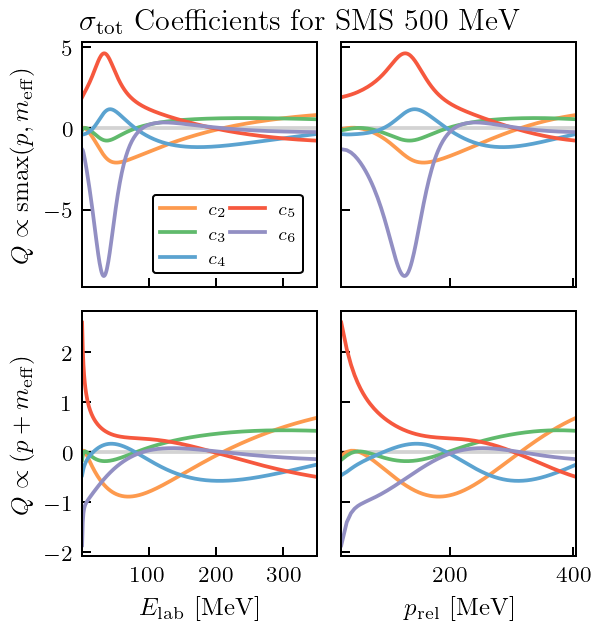

In [5]:
# sets breakdown and soft scales 
breakdown = 600
mpi = 138

# evaluates ratios
Q_max_p = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_max_E = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_s_p = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_s_E = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.5,3.5))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(r'$\sigma_{\mathrm{tot}}$ Coefficients for SMS 500 MeV', 
             y=1.01, 
             fontsize = 12)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpi{mpi}.png')

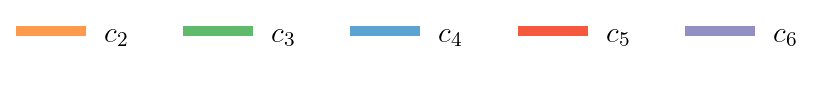

In [6]:
def export_legend(ax, filename="legend.png"):
    fig2 = plt.figure(figsize=(5, 0.5))
    ax2 = fig2.add_subplot()
    ax2.axis('off')
    legend = ax2.legend(*ax.get_legend_handles_labels(), 
                        frameon=False, loc='lower center', ncol=5, 
                       fontsize = 12)
    for i in range(5):
        legend.get_lines()[i].set_linewidth(4)
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
export_legend(axes[0, 0])

#### Figs. 5a, 6a

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


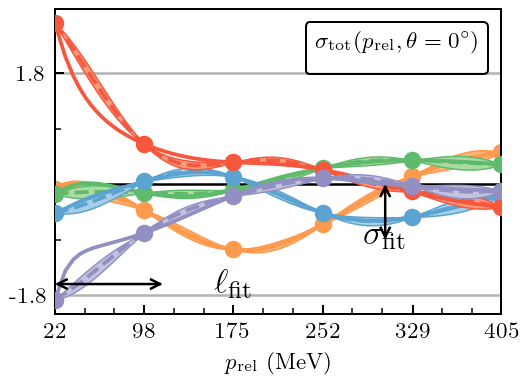

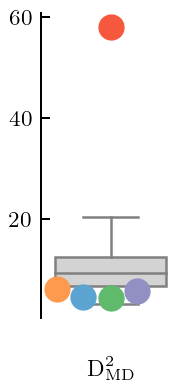

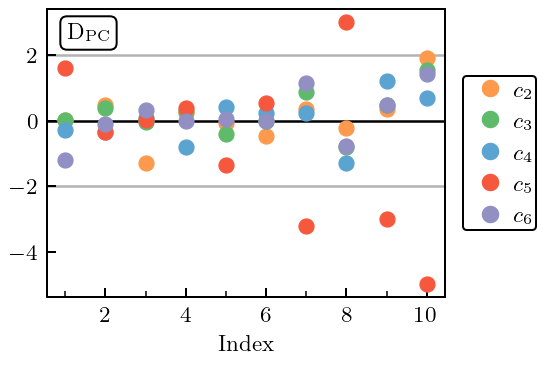

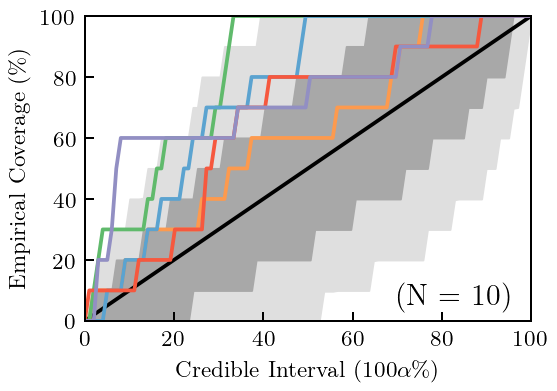

self.online_data = [4265.70505 2919.6149  2296.82359 1909.53418 1637.34535 1432.82884
 1272.46728 1142.90319 1035.84435  945.81038  869.0028   802.70941
  744.90114  694.0724   649.029    608.86641  572.82975  540.34396
  510.90502  484.13131  459.67134  437.26318  416.65283  397.6556
  380.08629  363.80012  348.66437  334.57747  321.42674  309.13945
  297.61682  286.81343  276.66876  267.12879  258.14518  249.64759
  241.62454  234.04072  226.86417  220.06589  213.59679  207.45608
  201.62182  196.07388  190.79385  185.74544  180.93284  176.34171
  171.95879  167.77182  163.75273  159.90805  156.22801  152.70353
  149.32615  146.07337  142.95272  139.95732  137.08075  134.31699
  131.64752  129.08015  126.60992  124.23216  121.9425   119.72531
  117.58836  115.52799  113.54072  111.62329  109.76232  107.96533
  106.22953  104.55233  102.93124  101.35462   99.82964   98.35419
   96.92625   95.54391   94.19694   92.89213   91.62782   90.40244
   89.2145    88.05494   86.93012   85.83875

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


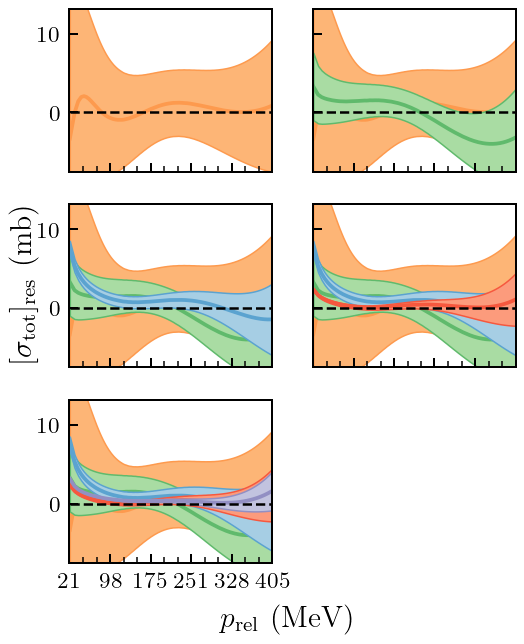

self.x has shape (350, 1)
self.x_test has shape (10, 1)
data_true has shape (350,)
self.data has shape (6, 350)
self.mask_restricted has shape (6,)
self.norm_residuals_wp has shape (50,)


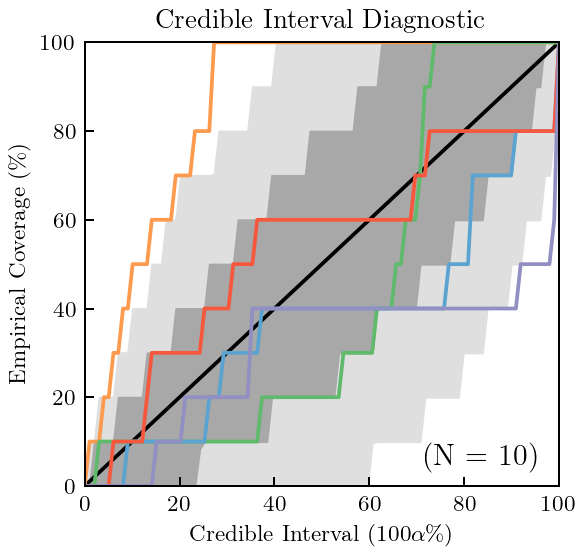

In [7]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    x_quantities_array = [[], [0]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=600,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=True,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_mpi138",
)

#### $m_{\mathrm{eff}} = 200\,\mathrm{MeV}$, $\Lambda_{b} = 600\,\mathrm{MeV}$

#### Fig. 3

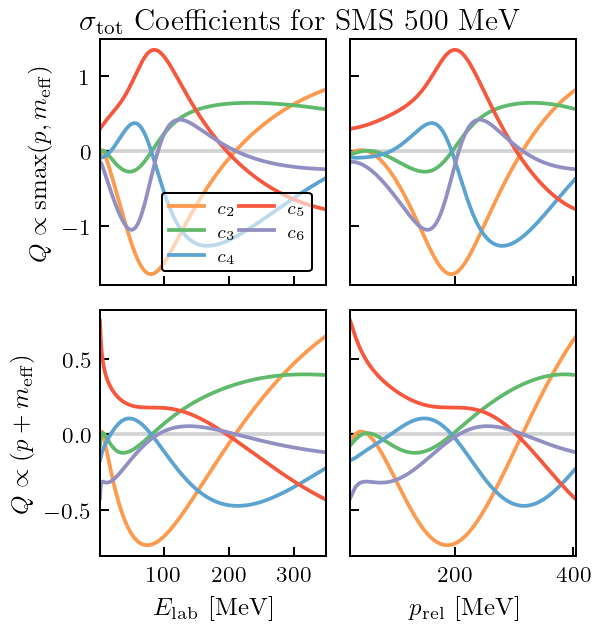

In [8]:
# sets breakdown and soft scales 
breakdown = 600
mpi = 200

# evaluates ratios
Q_max_p = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_max_E = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_s_p = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_s_E = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.5,3.5))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(r'$\sigma_{\mathrm{tot}}$ Coefficients for SMS 500 MeV', 
             y=1.01, 
             fontsize = 12)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpi{mpi}.png')

#### Figs. 5b, 6b

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


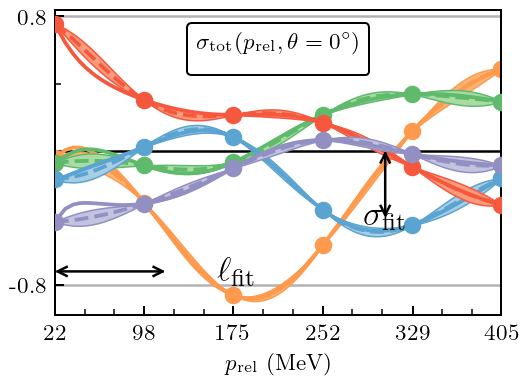

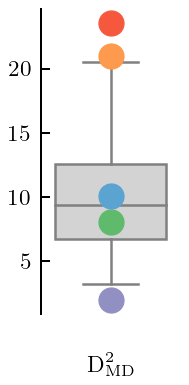

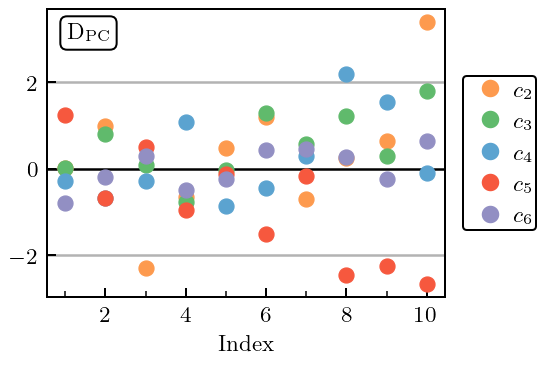

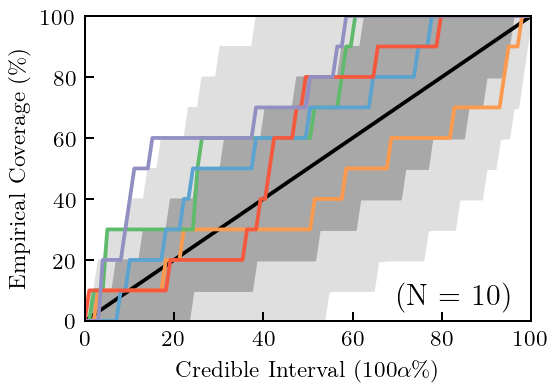

self.online_data = [4265.70505 2919.6149  2296.82359 1909.53418 1637.34535 1432.82884
 1272.46728 1142.90319 1035.84435  945.81038  869.0028   802.70941
  744.90114  694.0724   649.029    608.86641  572.82975  540.34396
  510.90502  484.13131  459.67134  437.26318  416.65283  397.6556
  380.08629  363.80012  348.66437  334.57747  321.42674  309.13945
  297.61682  286.81343  276.66876  267.12879  258.14518  249.64759
  241.62454  234.04072  226.86417  220.06589  213.59679  207.45608
  201.62182  196.07388  190.79385  185.74544  180.93284  176.34171
  171.95879  167.77182  163.75273  159.90805  156.22801  152.70353
  149.32615  146.07337  142.95272  139.95732  137.08075  134.31699
  131.64752  129.08015  126.60992  124.23216  121.9425   119.72531
  117.58836  115.52799  113.54072  111.62329  109.76232  107.96533
  106.22953  104.55233  102.93124  101.35462   99.82964   98.35419
   96.92625   95.54391   94.19694   92.89213   91.62782   90.40244
   89.2145    88.05494   86.93012   85.83875

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


self.std_trunc = [0.22238252 0.20162618 0.19541051 0.19282521 0.19165726 0.19119801
 0.19115457 0.19138315 0.19180358 0.19236679 0.19304042 0.19380207
 0.19463546 0.19552848 0.19647191 0.19745849 0.19848256 0.19953966
 0.20062615 0.20173907 0.20287614 0.20403551 0.20521563 0.20641525
 0.20763348 0.20886962 0.2101231  0.21139348 0.21268043 0.21398385
 0.21530369 0.21663994 0.21799262 0.2193618  0.22074766 0.22215048
 0.22357051 0.225008   0.2264632  0.22793635 0.22942783 0.23093804
 0.23246735 0.23401612 0.23558468 0.23717334 0.23878245 0.24041245
 0.24206377 0.2437368  0.24543191 0.24714945 0.24888973 0.25065307
 0.25243988 0.25425059 0.25608559 0.25794523 0.25982985 0.26173975
 0.2636752  0.26563651 0.26762405 0.26963821 0.27167934 0.27374775
 0.27584375 0.27796759 0.28011953 0.28229978 0.28450866 0.28674652
 0.28901366 0.2913104  0.293637   0.29599371 0.29838074 0.3007983
 0.30324657 0.30572583 0.30823637 0.31077847 0.31335241 0.31595842
 0.31859671 0.3212675  0.32397095 0.32670722 0

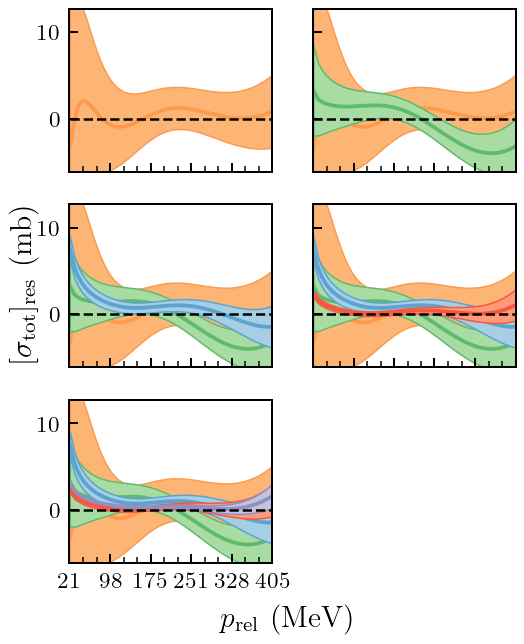

self.x has shape (350, 1)
self.x_test has shape (10, 1)
data_true has shape (350,)
self.data has shape (6, 350)
self.mask_restricted has shape (6,)
self.norm_residuals_wp has shape (50,)


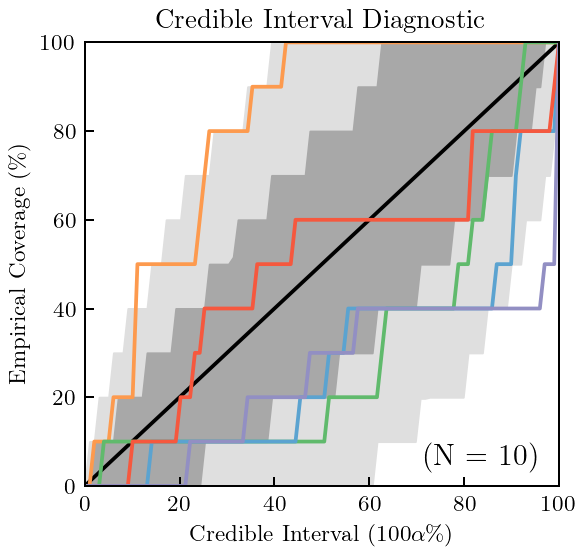

In [9]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    x_quantities_array = [[], [0]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=200,
    Lambdab=600,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=True,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_mpi200",
)

#### $m_{\mathrm{eff}}$ and $\Lambda_{b}$ set to optimal values (see code)

#### Fig. 8

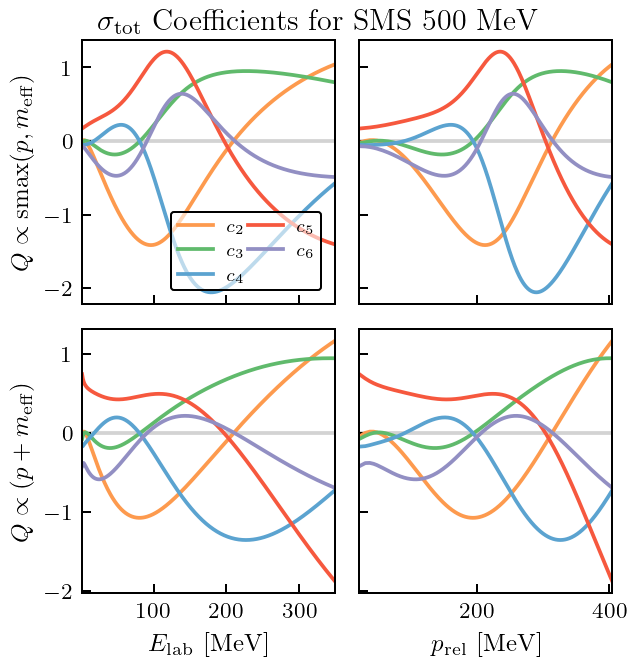

In [10]:
# evaluates ratios with optimal values of breakdown and soft scale for each combination of 
# Q parametrization and input space
# Q_max_E = Q_approx(p_rel, "smax", 460, m_pi = 158)
# Q_max_p = Q_approx(p_rel, "smax", 377, m_pi = 106)
# Q_s_E = Q_approx(p_rel, "sum", 517, m_pi = 189)
# Q_s_p = Q_approx(p_rel, "sum", 477, m_pi = 141)
# Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]
# Q_max_E = Q_approx(p_rel, "smax", 760, m_pi = 240)
Q_max_E = Q_approx(p_rel, "smax", 670, m_pi = 250)
Q_max_p = Q_approx(p_rel, "smax", 670, m_pi = 250)
# Q_s_E = Q_approx(p_rel, "sum", 1500, m_pi = 450)
Q_s_E = Q_approx(p_rel, "sum", 990, m_pi = 350)
Q_s_p = Q_approx(p_rel, "sum", 990, m_pi = 350)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, 
                         sharex='col', 
                         sharey='row', 
                         figsize=(3.7,3.7))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(fr'$\sigma_{{\mathrm{{tot}}}}$ Coefficients for SMS 500 MeV', 
             y=1.01, fontsize = 12)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpiopt.png')

## Plot for all $Q$ prescriptions against $p_{\rm rel}$

#### Fig. 2

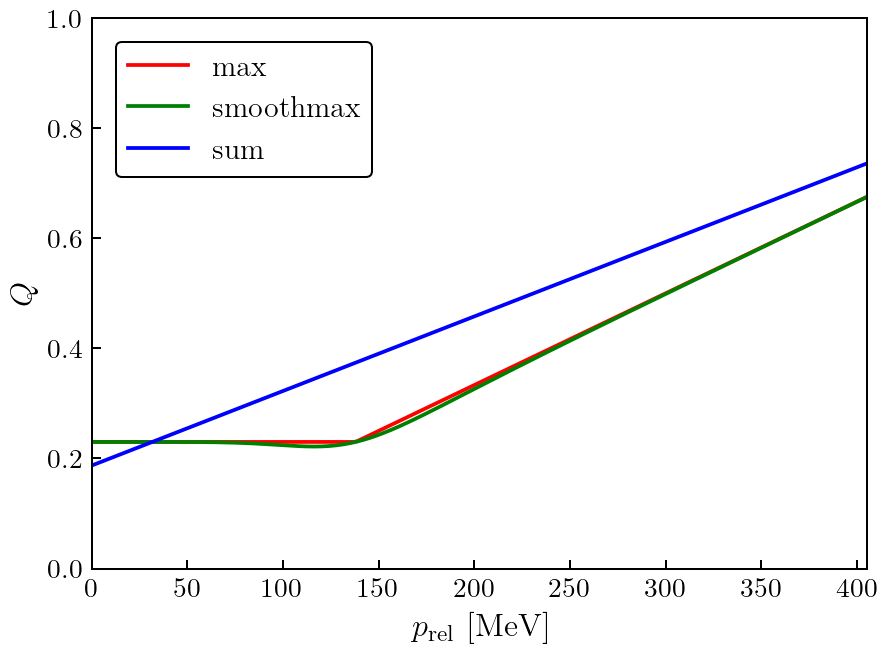

In [11]:
Elab_array = np.linspace(0, 350, 351)

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "max", Lambda_b=Lambdab, m_pi = 138), 
        c = 'red', label = "max")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "smax", Lambda_b=Lambdab, m_pi = 138), 
        c = 'green', label = "smoothmax")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "sum", Lambda_b=Lambdab, m_pi = 138), 
        c = 'blue', label = r'sum')

axis_font = {'size':'13'}
ax.set_xlabel(r'$p_{\mathrm{rel}}$ [MeV]', **axis_font)
ax.set_ylabel(r'$Q$', **axis_font)
ax.set_ylim(0, 1)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.legend(loc = 'upper left', prop={'size': 12}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/Qparamvsprel.png')

## Evaluates the ratio $Q_{\rm sum} / Q_{\rm smax}$ over the relevant range in momentum and compares to a linear fit function

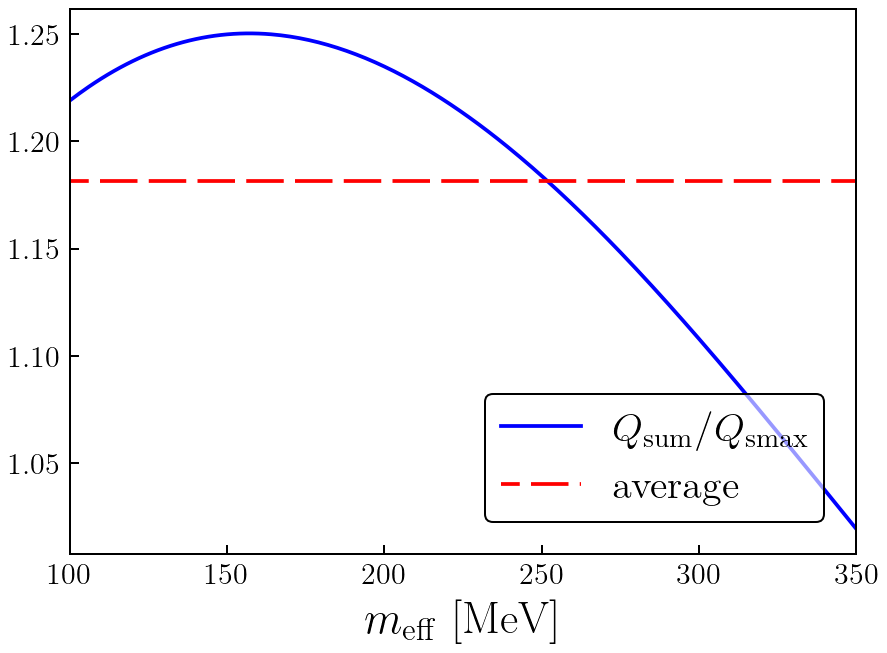

In [12]:
def Qcomparison(prel, Lambda_b, mpi):
    return scipy.integrate.trapz(
            Q_approx(prel, "sum", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel) / \
        scipy.integrate.trapz(
            Q_approx(prel, "smax", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel)
            

Elab_array = np.linspace(1, 350, 350)
prel_array = E_to_p(Elab_array, 'np')
mpi_array = np.linspace(50, 350, 301)
mpi_array = mpi_array[mpi_array >= 100]

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(mpi_array, [Qcomparison(prel_array, Lambdab, m) for m in mpi_array], 
        c = 'blue', label = r'$Q_{\mathrm{sum}}/Q_{\mathrm{smax}}$')
# ax.plot(mpi_array, Qsum_to_Qsmoothmax(mpi_array), 
#         c = 'orange', label = 'fitted')
ax.plot(mpi_array, 
        np.average([Qcomparison(prel_array, Lambdab, m) for m in mpi_array]) * np.ones(len(mpi_array)), 
        c = 'red', linestyle = (5, (10, 3)), label = r'average')
# ax.plot(mpi_array, 
#         1.6 * np.ones(len(mpi_array)), 
#         c = 'red', linestyle = (5, (10, 3)), label = r'$a_{\mathrm{sum}}$')

axis_font = {'size':'18'}
ax.set_xlabel(r'$m_{\mathrm{eff}}$ [MeV]', **axis_font)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc = 'lower right', prop={'size': 16}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/QsumQsmax.png')

## Plots $Q$ as a constant at different slices in momentum and fits to linear curve

#### Fig. 7

2024-05-05 14:41:52,953	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.24232323
Observable Obs., variable Q: mean = 0.24364375320891224
Observable Obs., variable Q: std. dev. = 0.005977614214516567


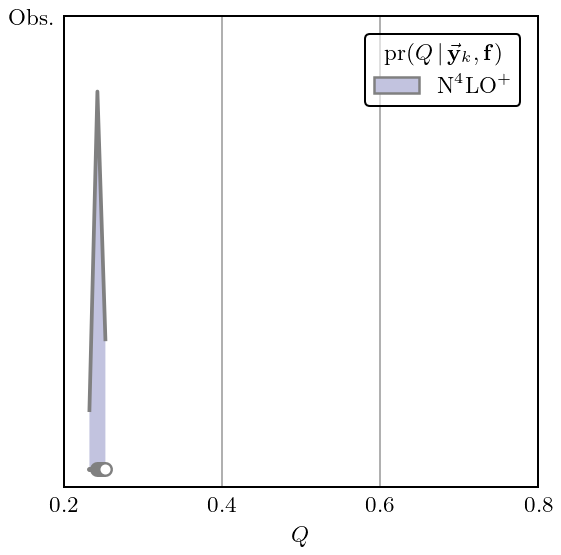

2024-05-05 14:42:20,797	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.2928283
Observable Obs., variable Q: mean = 0.2963287689416157
Observable Obs., variable Q: std. dev. = 0.009368233860685289


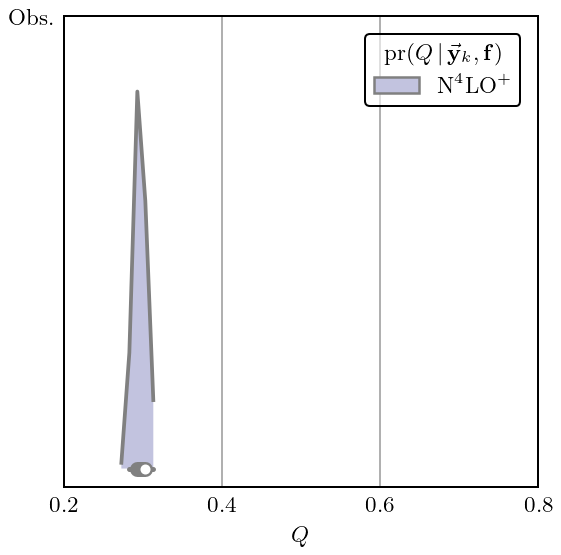

2024-05-05 14:42:45,931	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.32313132
Observable Obs., variable Q: mean = 0.3256354543588367
Observable Obs., variable Q: std. dev. = 0.009143220593991917


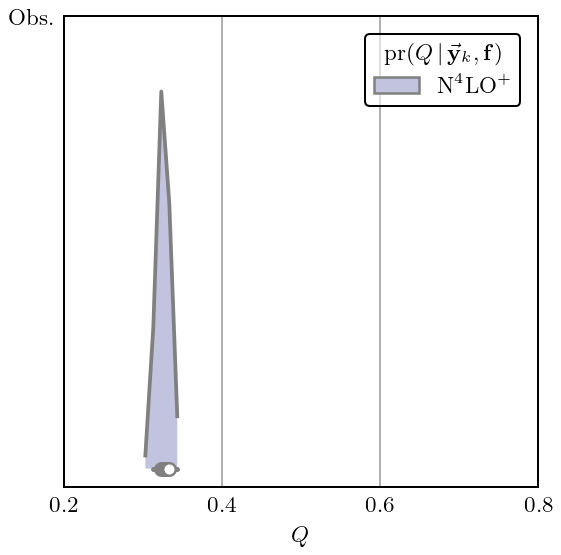

2024-05-05 14:43:10,904	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.3332323
Observable Obs., variable Q: mean = 0.3356955391947379
Observable Obs., variable Q: std. dev. = 0.009821763916107703


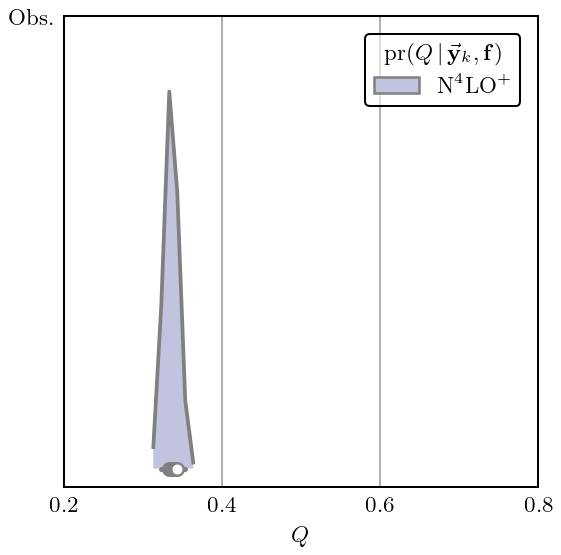

2024-05-05 14:43:34,920	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.36353534
Observable Obs., variable Q: mean = 0.35989207516030924
Observable Obs., variable Q: std. dev. = 0.011492467687130225


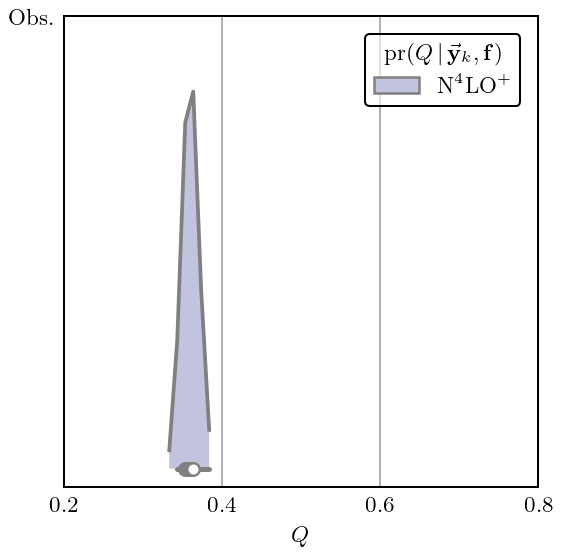

2024-05-05 14:43:58,946	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.39383838
Observable Obs., variable Q: mean = 0.391957799233701
Observable Obs., variable Q: std. dev. = 0.012967827860193442


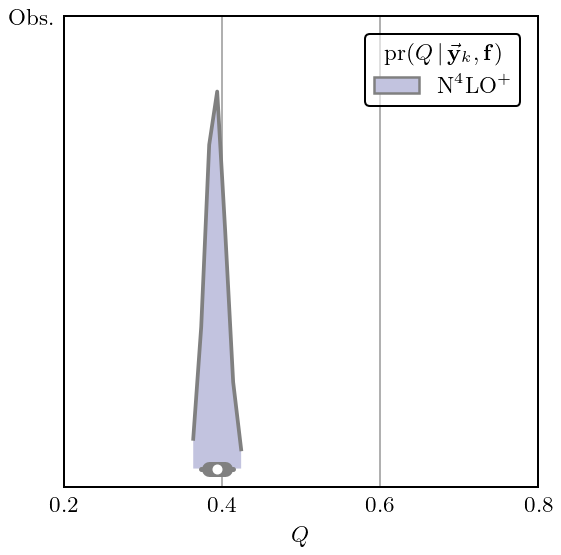

2024-05-05 14:44:23,878	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.41404042
Observable Obs., variable Q: mean = 0.4151968707623981
Observable Obs., variable Q: std. dev. = 0.014140095316316818


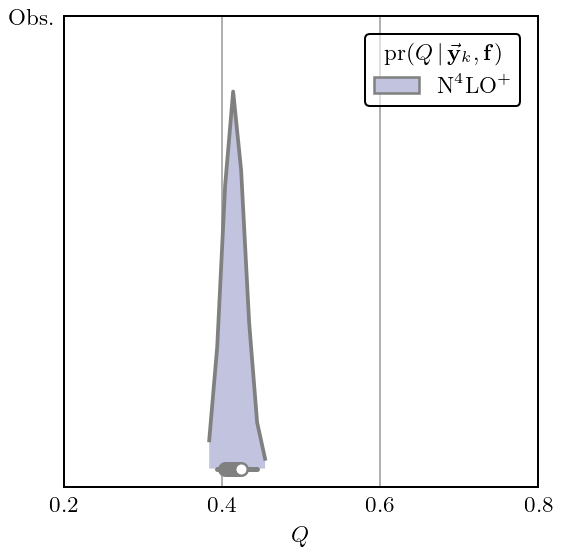

2024-05-05 14:44:49,011	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.43424243
Observable Obs., variable Q: mean = 0.4348938716343726
Observable Obs., variable Q: std. dev. = 0.014000319833628065


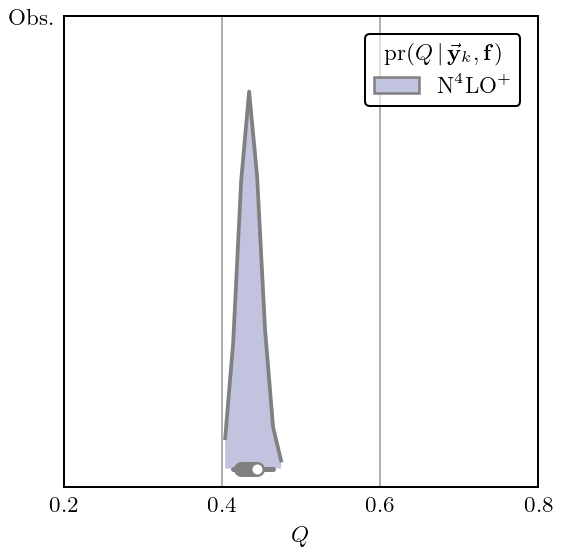

2024-05-05 14:45:15,184	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.46454546
Observable Obs., variable Q: mean = 0.4642376685926921
Observable Obs., variable Q: std. dev. = 0.014580509016496192


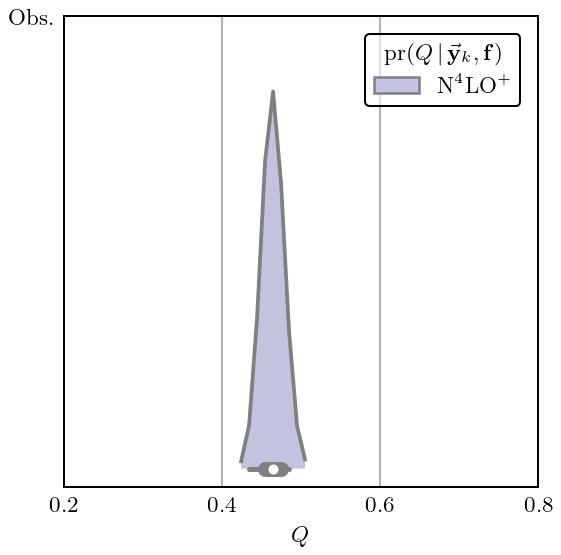

2024-05-05 14:45:43,258	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.47464648
Observable Obs., variable Q: mean = 0.4799608103508783
Observable Obs., variable Q: std. dev. = 0.016397929193113


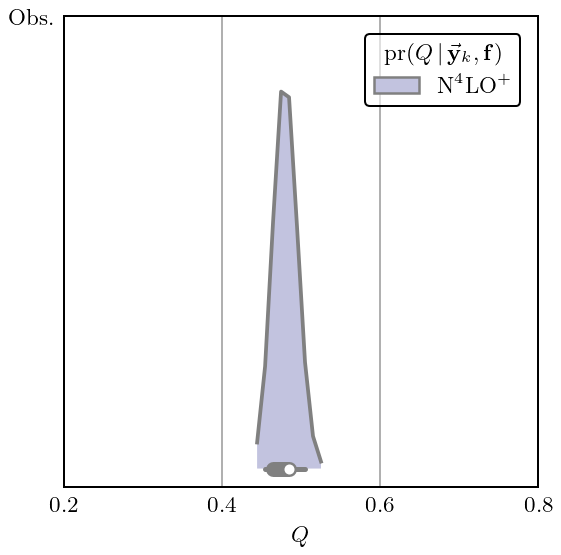

2024-05-05 14:46:08,259	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.4948485
Observable Obs., variable Q: mean = 0.49190522147460386
Observable Obs., variable Q: std. dev. = 0.01697684404073451


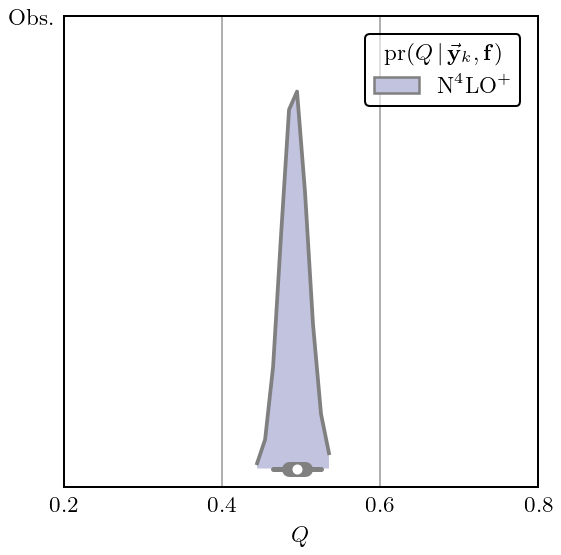

2024-05-05 14:46:34,391	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.5251515
Observable Obs., variable Q: mean = 0.5214222937285012
Observable Obs., variable Q: std. dev. = 0.018782915493929284


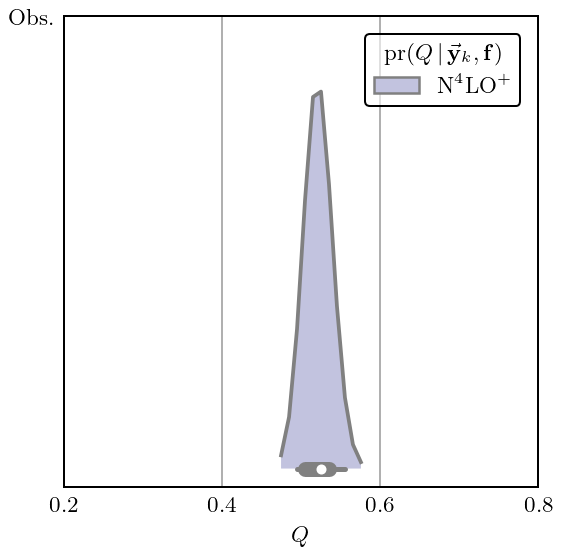

2024-05-05 14:46:59,579	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.54535353
Observable Obs., variable Q: mean = 0.5495444242253626
Observable Obs., variable Q: std. dev. = 0.02011448604989059


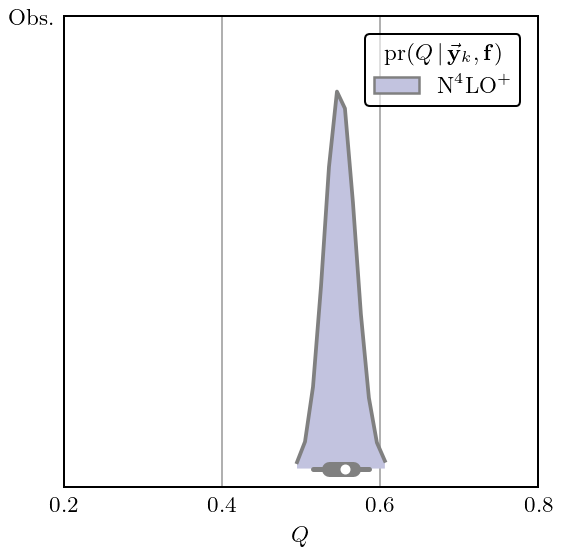

2024-05-05 14:47:25,718	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.5756566
Observable Obs., variable Q: mean = 0.5735607747164714
Observable Obs., variable Q: std. dev. = 0.02046004552568438


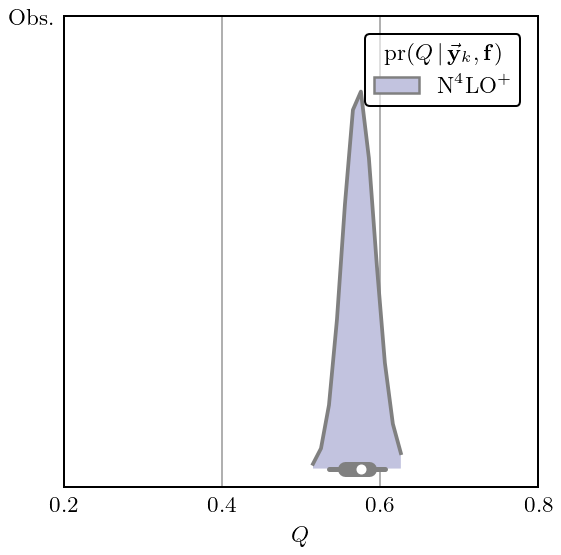

2024-05-05 14:47:52,013	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.5958586
Observable Obs., variable Q: mean = 0.5966339622183864
Observable Obs., variable Q: std. dev. = 0.020696060137969357


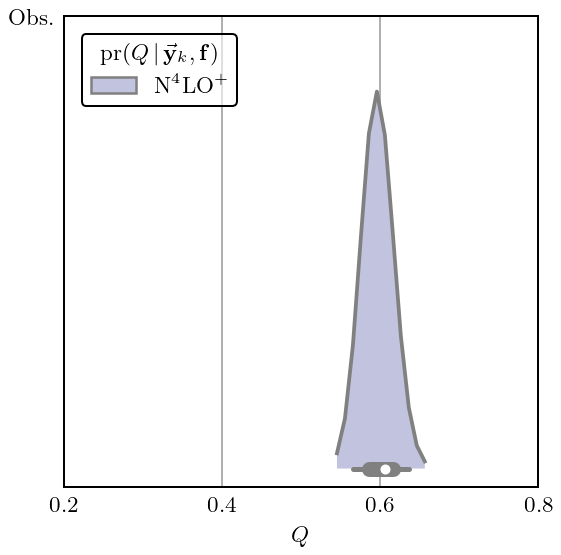

2024-05-05 14:48:17,752	INFO worker.py:1553 -- Started a local Ray instance.


obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
obs_data_train has shape (6, 7)
Observable Obs., variable Q: MAP value = 0.6160606
Observable Obs., variable Q: mean = 0.6195426009241733
Observable Obs., variable Q: std. dev. = 0.021258922361654015


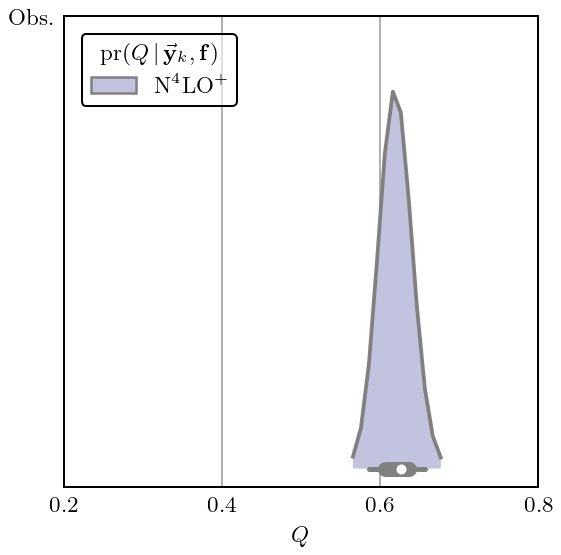

In [13]:
# fixed values of relative momentum where fitting will take place
Elab_fit_pts = np.array([1, 5, 12, 21, 
                         33, 48, 65, 85, 
                         108, 133, 161, 192, 
                         225, 261, 300, 341])
prel_fit_pts = E_to_p(E_lab = Elab_fit_pts, interaction = "np")

# creates every object necessary to evaluate Q posteriors curvewise at fixed momentum
ls_deg_vals = np.linspace(0.01, 4, 100, dtype=np.dtype('f4'))
q_vals = np.linspace(0.01, 1.01, 100, dtype=np.dtype('f4'))

mesh_cart_q = gm.cartesian(q_vals, np.log(ls_deg_vals))

QVariable = RandomVariable(var=q_vals,
                                user_val=0.3,
                                name='Q',
                                label="Q",
                                units="",
                                ticks=[0.2, 0.4, 0.6, 0.8],
                                logprior=np.zeros(len(q_vals)),
                                logprior_name="noprior",
                                marg_bool=True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                               user_val=None,
                               name='lsdeg',
                               label="\ell_{\Theta}",
                               units="",
                               ticks=[],
                               logprior=np.zeros(len(ls_deg_vals)),
                               logprior_name="noprior",
                               marg_bool=False)
variables_array = np.array([QVariable, LsDegVariable])

# ALLOBS for angle input spaces
plot_obs_list = [["DSG", "D", "AXX", "AYY", "A", "AY"]]
obs_name_grouped_list = ["ALLOBS"]
obs_labels_grouped_list = [r'Obs.']
mesh_cart_grouped_list = [[mesh_cart_q, mesh_cart_q, mesh_cart_q, mesh_cart_q,
                           mesh_cart_q, mesh_cart_q]]

ratio_fn = ratio_fn_posterior_const
ratio_fn_kwargs = {
                  "Q" : 0.3
}
log_likelihood_fn = log_likelihood_const
log_likelihood_fn_kwargs = {}

Q_fit_pts = np.array([])
Q_fit_stddev = np.array([])

for elfp in Elab_fit_pts:
    stats_array, _ = generate_posteriors(
        scale_scheme_bunch_array=[RKE500MeV],
        Q_param_method_array=["sum"],
        p_param_method_array=["pprel"],
        input_space_deg=["cos"],
        input_space_tlab=["prel"],
        Elab_slice = elfp,
        t_lab_train_pts=np.array([1, 12, 33, 65, 108, 161, 225, 300]),
        degrees_train_pts=np.array([41, 60, 76, 90, 104, 120, 139]),
        orders_from_ho=1,
        orders_excluded=[],
        orders_names_dict=None,
        orders_labels_dict=None,
        length_scale_list = [NSKernelParam(0.4, [0.05, 3])],
        m_pi_eff=141,
        Lambdab=480,
        print_all_classes=False,
        savefile_type="png",

        plot_posterior_curvewise_bool=True,
        plot_corner_curvewise_bool=False,
        use_data_curvewise_bool=False,
        save_data_curvewise_bool=False,
        save_posterior_curvewise_bool=False,

        plot_obs_list = plot_obs_list,
        obs_name_grouped_list = obs_name_grouped_list,
        obs_labels_grouped_list = obs_labels_grouped_list,
        mesh_cart_grouped_list = mesh_cart_grouped_list,
        variables_array_curvewise = variables_array,
        
        ratio_fn_posterior = ratio_fn,
        ratio_fn_kwargs_posterior = ratio_fn_kwargs,
        log_likelihood_fn_posterior = log_likelihood_fn,
        log_likelihood_fn_kwargs_posterior = log_likelihood_fn_kwargs,

        plot_posterior_pointwise_bool=False,
        save_posterior_pointwise_bool=False,

        variables_array_pointwise = np.array([0]),

        filename_addendum="",
    )
    
    Q_fit_pts = np.append(Q_fit_pts, stats_array[0])
    Q_fit_stddev = np.append(Q_fit_stddev, stats_array[2])

N4LO+: Lambda_b = 777.2036646616019 +/- 17.549461701453005 MeV
N4LO+: m_eff = 237.9451308035851 +/- 10.165173122996256 MeV



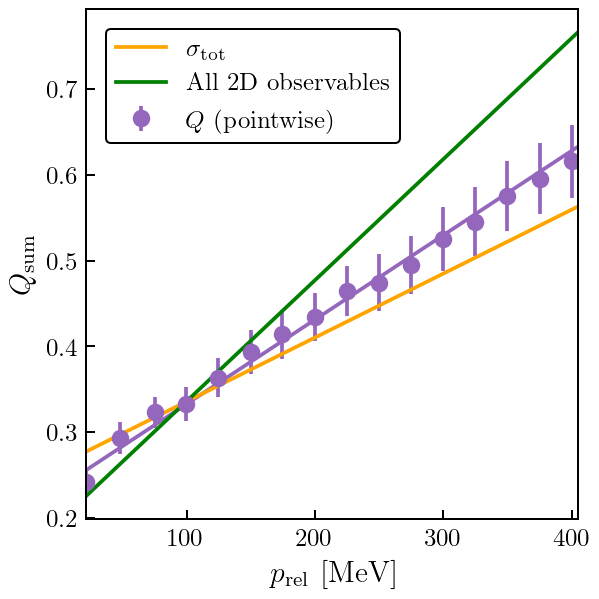

In [14]:
from sklearn.linear_model import LinearRegression

fig_fit, ax_fit = plt.subplots(figsize=(3.5,3.5))

def q_sum(x, lambda_b, m_pi):
    return (x + m_pi) / (m_pi + lambda_b)

# scatter-plots the means and 95% (2 sigma) confidence intervals for the N4LO+ Q posterior pdfs
ax_fit.errorbar(prel_fit_pts, Q_fit_pts, yerr = 2 * Q_fit_stddev,
                color = 'tab:purple', label = r'$Q$ (pointwise)', fmt = 'o')
# fits the points to a line
popt, pcov = scipy.optimize.curve_fit(q_sum, prel_fit_pts, Q_fit_pts, 
                                     sigma = Q_fit_stddev)
# plots the line of best fit
ax_fit.plot(E_to_p(E_lab = t_lab, interaction = 'np'), 
            q_sum(E_to_p(E_lab = t_lab, interaction = 'np'), popt[0], popt[1]), 
            color = 'tab:purple')
# prints the best fit values
print("N4LO+: Lambda_b = " + str(popt[0]) + " +/- " + str(np.sqrt(pcov[0, 0])) + " MeV")
print("N4LO+: m_eff = " + str(popt[1]) + " +/- " + str(np.sqrt(pcov[1, 1])) + " MeV\n")

# plots Qsum(prel) with Lambda_b and m_pi values extracted from the total cross section posterior pdf
ax_fit.plot(E_to_p(E_lab = t_lab, interaction = 'np'), 
           Q_approx(p = E_to_p(E_lab = t_lab, interaction = 'np'), 
                   Q_parametrization = 'sum', 
                    Lambda_b = 990, 
                    m_pi = 350), 
            color = 'orange', label = r'$\sigma_{\mathrm{tot}}$')
# plots Qsum(prel) with Lambda_b and m_pi values extracted from all the 2D observables' posterior pdf
ax_fit.plot(E_to_p(E_lab = t_lab, interaction = 'np'), 
           Q_approx(p = E_to_p(E_lab = t_lab, interaction = 'np'), 
                   Q_parametrization = 'sum', 
                    Lambda_b = 570, 
                    m_pi = 138), 
            color = 'green', label = r'All 2D observables')

# fig_fit.suptitle("MAP $Q$ values and lines of fit", fontsize = 20)
ax_fit.set_xlabel("$p_{\mathrm{rel}}$ [MeV]", fontsize = 12)
ax_fit.set_ylabel(r"$Q_{\mathrm{sum}}$", fontsize = 12)
ax_fit.legend(fontsize = 10, loc = 'upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig_fit.tight_layout()

fig_fit.savefig('figures/' + 'qvsp_linear')

## Plots graphical and statistical diagnostics for all figures in the paper

#### Fig. 10

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


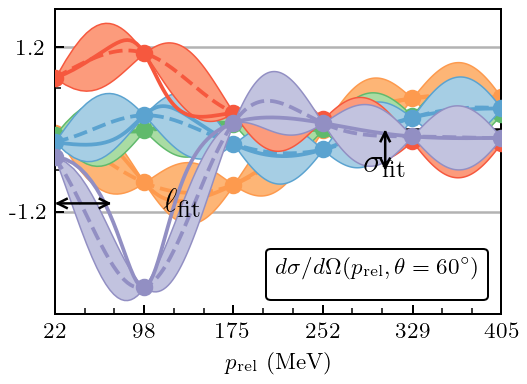

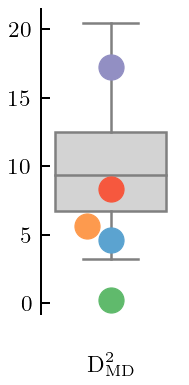

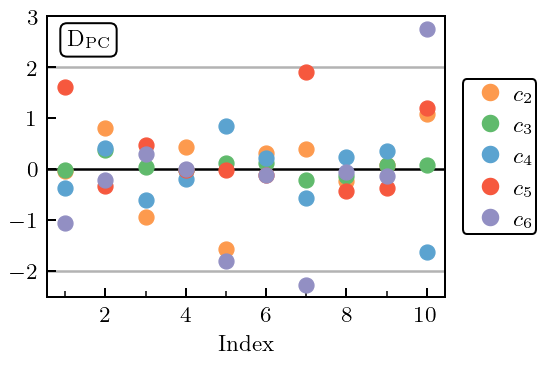

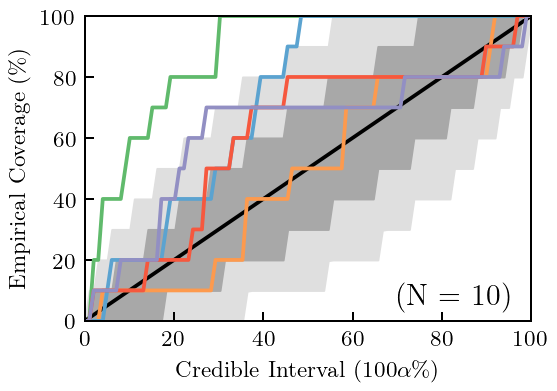

In [15]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    x_quantities_array = [[], [60]],
    Q_param_method_array=["smax"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=106,
    Lambdab=378,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 11

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


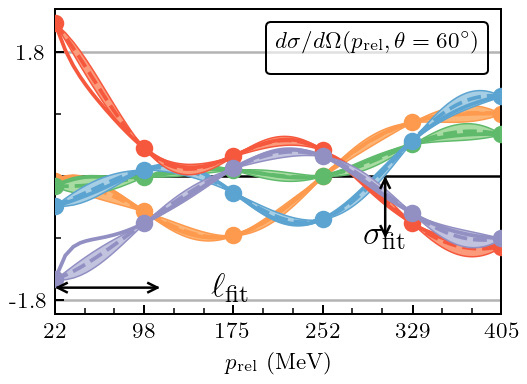

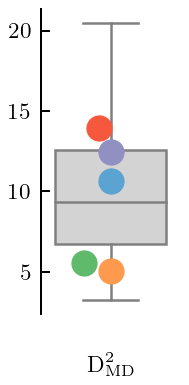

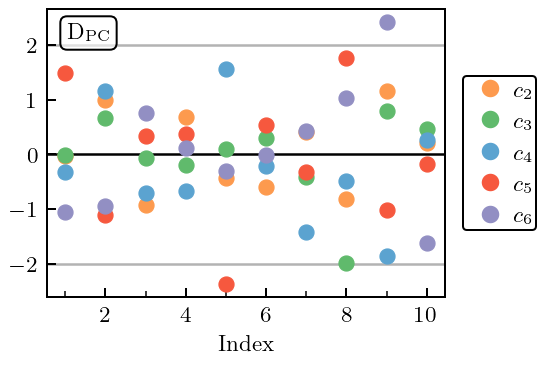

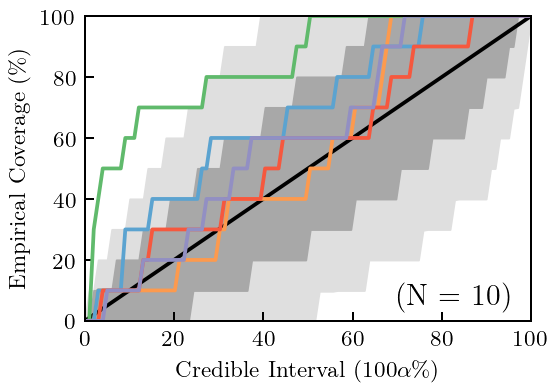

In [16]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    x_quantities_array = [[], [60]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Figs. 28, 26a

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


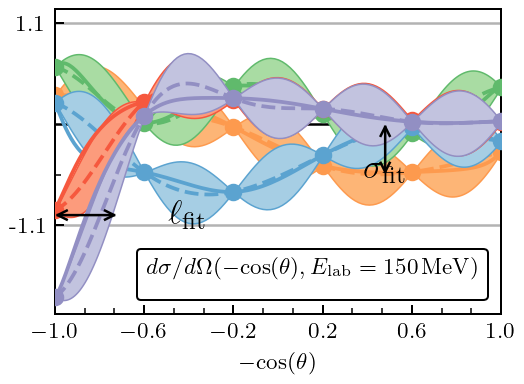

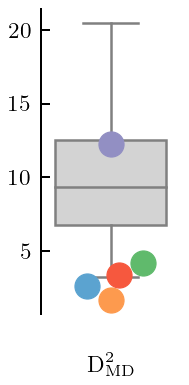

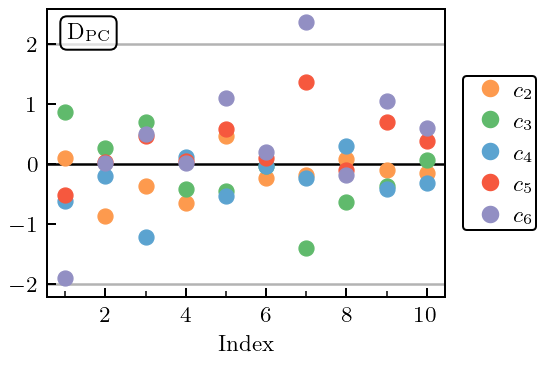

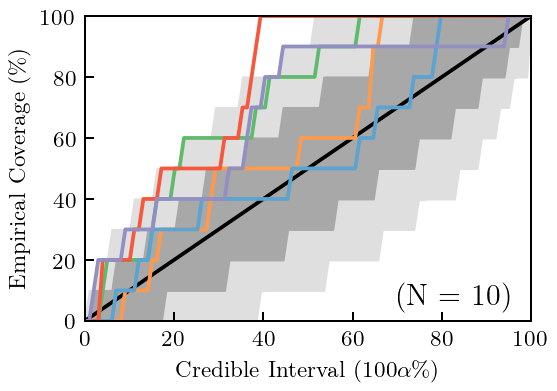

In [17]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    x_quantities_array = [[150], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofpq"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=172,
    Lambdab=660,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Figs. 12, 26b

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


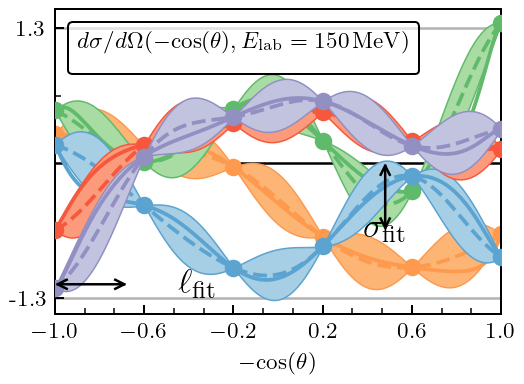

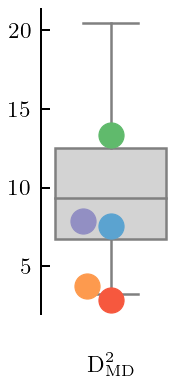

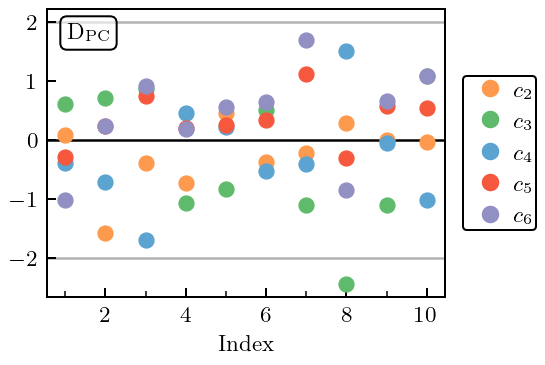

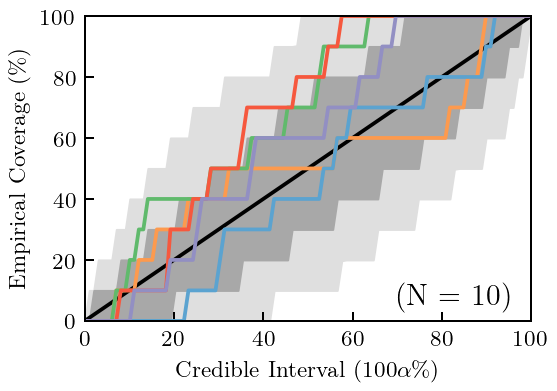

In [18]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    x_quantities_array = [[150], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 14

(1, 179)
[[  4.62984859   9.25934459  13.88813547  18.5158687   23.14219188
   27.7667527   32.38919897  37.00917867  41.62633998  46.24033129
   50.85080122  55.45739866  60.0597728   64.65757316  69.2504496
   73.83805235  78.42003204  82.99603974  87.56572698  92.12874574
   96.68474854 101.23338843 105.774319   110.30719445 114.83166958
  119.34739983 123.85404131 128.35125083 132.83868591 137.31600481
  141.78286656 146.23893099 150.68385877 155.11731138 159.53895121
  163.94844154 168.34544655 172.72963141 177.10066223 181.45820616
  185.80193134 190.13150699 194.44660338 198.74689191 203.0320451
  207.30173661 211.55564129 215.79343519 220.01479558 224.219401
  228.40693124 232.57706741 236.72949193 240.86388859 244.97994253
  249.07734029 253.15576986 257.21492063 261.25448349 265.27415081
  269.27361647 273.25257591 277.21072611 281.14776563 285.06339467
  288.95731502 292.82923016 296.67884521 300.50586703 304.31000415
  308.0909669  311.84846732 315.58221927 319.29193842 322

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


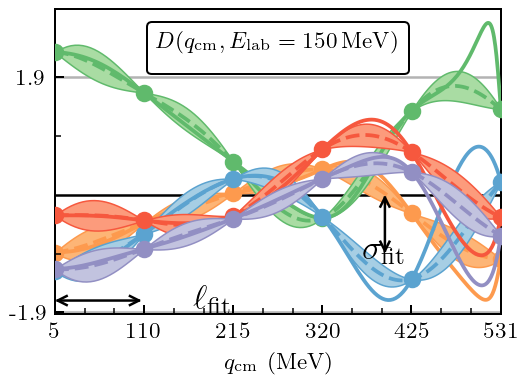

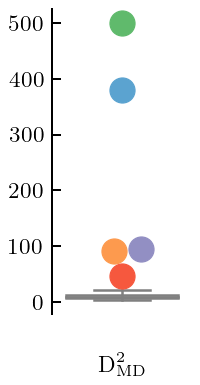

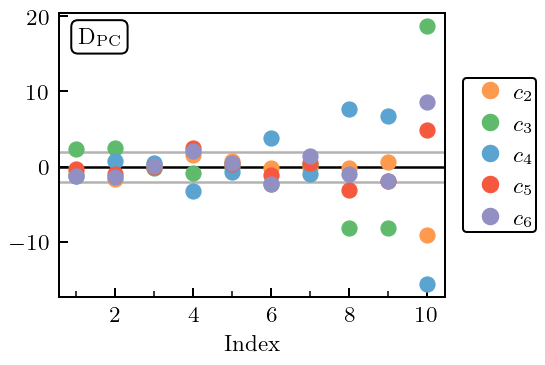

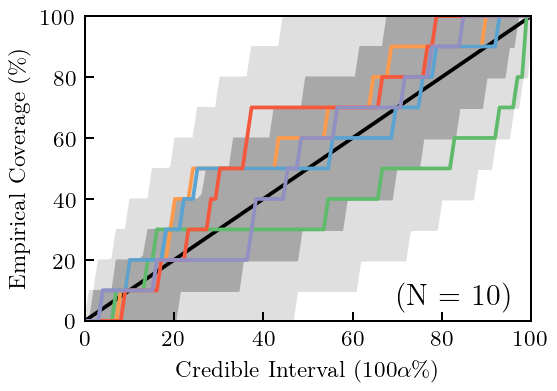

In [19]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    x_quantities_array = [[150], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["qcm"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=184,
    Lambdab=650,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 13

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


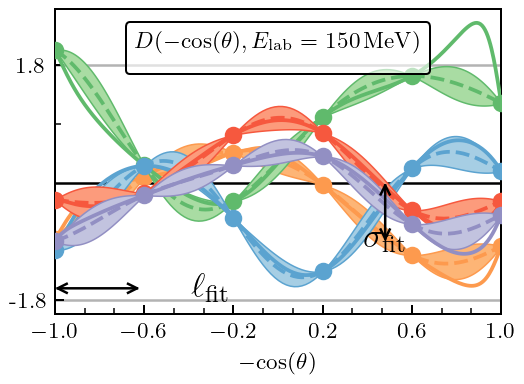

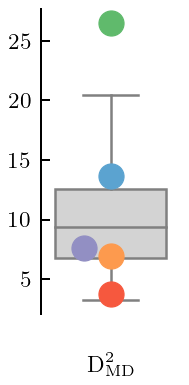

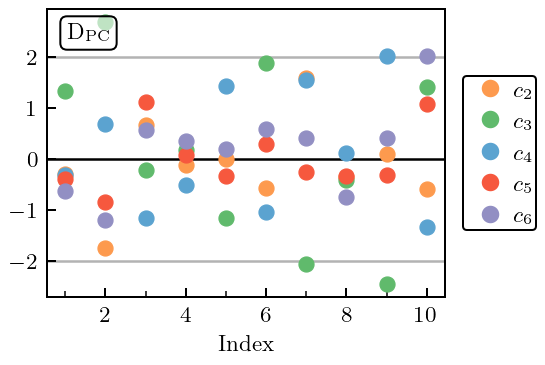

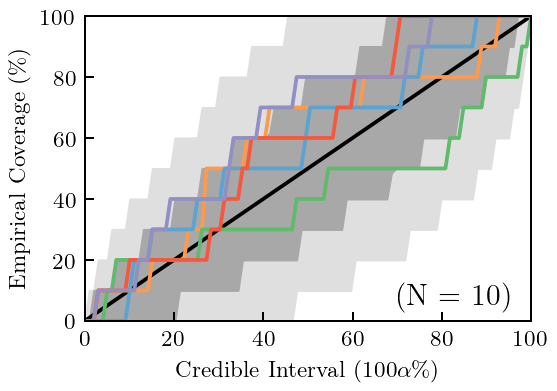

In [20]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    x_quantities_array = [[150], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Figs. 16, 27a

(350,)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


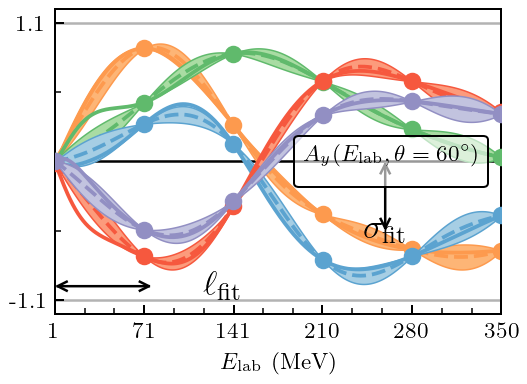

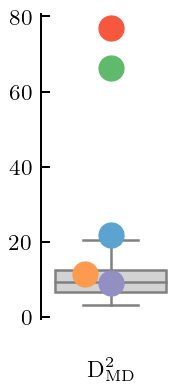

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


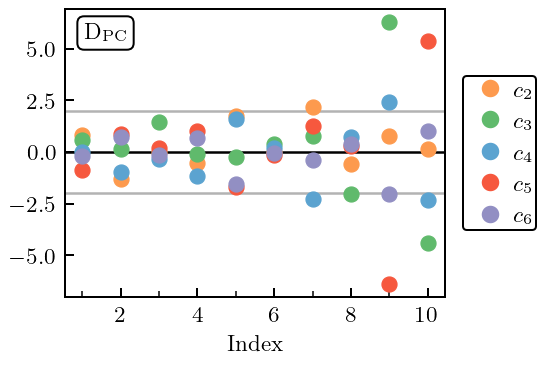

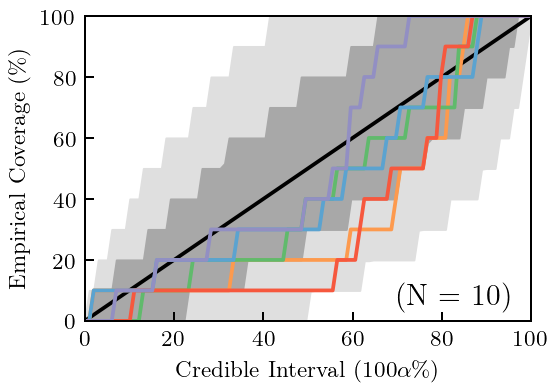

In [21]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    x_quantities_array = [[], [60]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["Elab"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list = [LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=186,
    Lambdab=610,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Figs. 15, 27b

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


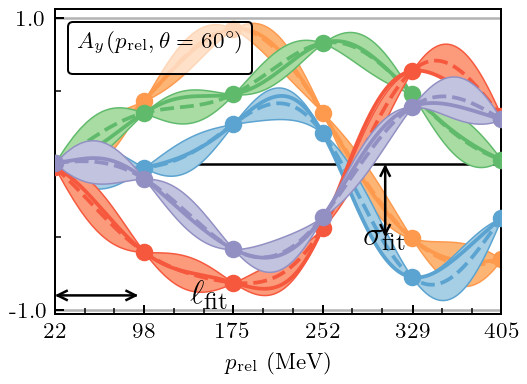

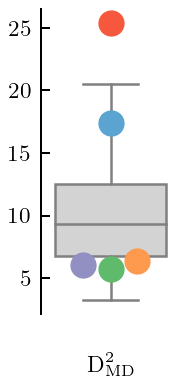

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


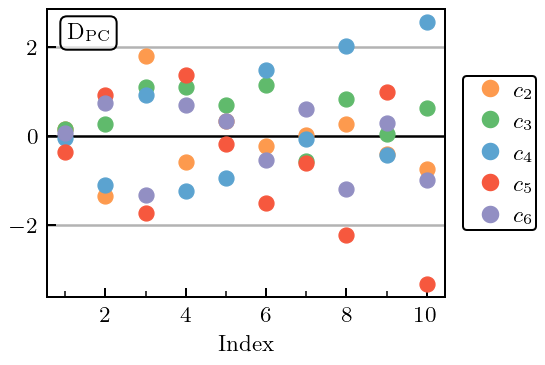

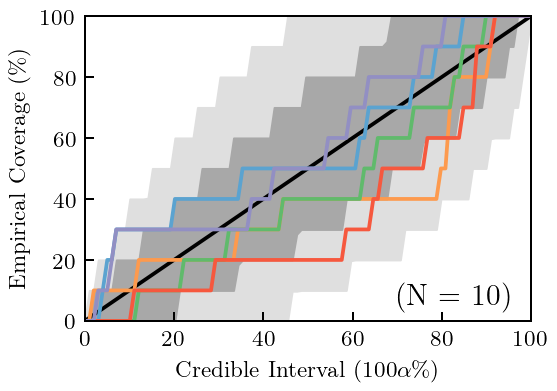

In [22]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    x_quantities_array = [[], [60]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 17

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


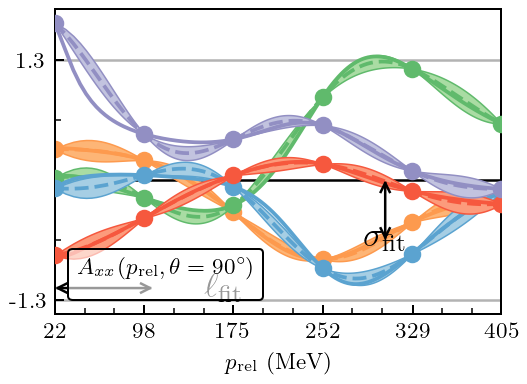

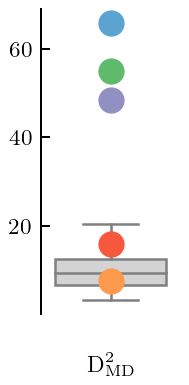

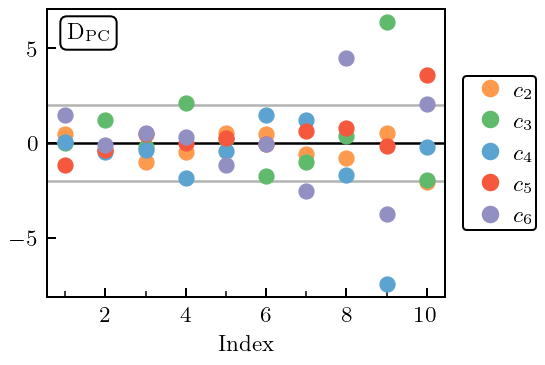

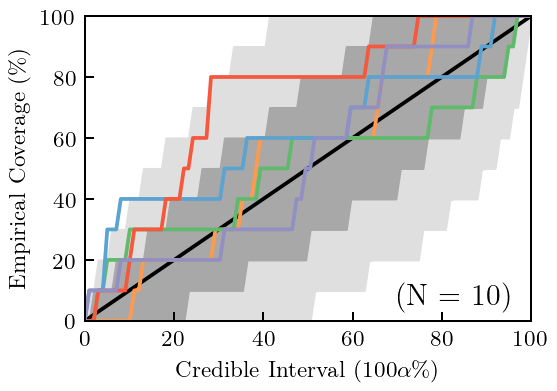

In [23]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AXX"],
    x_quantities_array = [[], [90]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 18

(350,)
[ 21.65954334  30.63121995  37.51542954  43.31908669  48.43221129
  53.05482927  57.30576523  61.26243994  64.97863008  68.4934901
  71.83657847  75.03085916  78.09459422  81.04259045  83.88705078
  86.63817351  89.30458516  91.89366002  94.41176078  96.86442276
  99.25649711 101.59226369 103.875521   106.10965878 108.29771701
 110.44243448 112.54628895 114.61153075 116.64021092 118.63420514
 120.59523396 122.52488024 124.42460409 126.29575578 128.13958699
 129.95726059 131.74985922 133.51839286 135.26380542 136.98698071
 138.6887476  140.36988473 142.03112463 143.67315752 145.29663458
 146.90217101 148.49034876 150.06171898 151.61680426 153.15610063
 154.68007949 156.18918919 157.68385665 159.16448875 160.63147359
 162.08518174 163.52596726 164.95416878 166.37011039 167.77410247
 169.16644257 170.54741606 171.91729685 173.27634803 174.62482246
 175.96296329 177.29100452 178.60917142 179.91768103 181.21674255
 182.50655773 183.78732124 185.05922101 186.32243857 187.57714933
 188

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)
(350,)


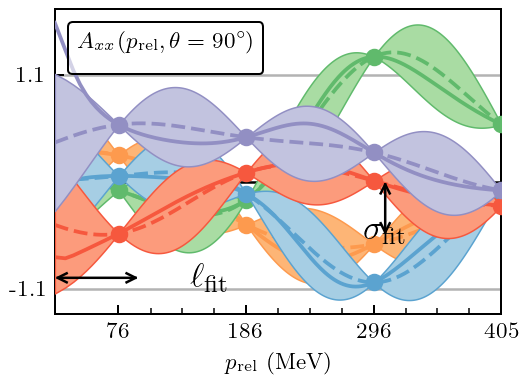

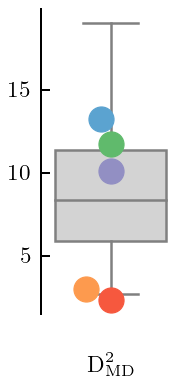

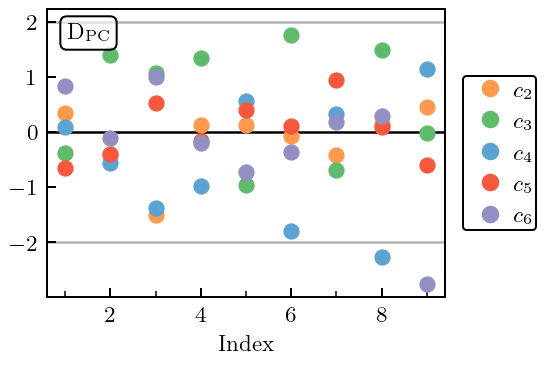

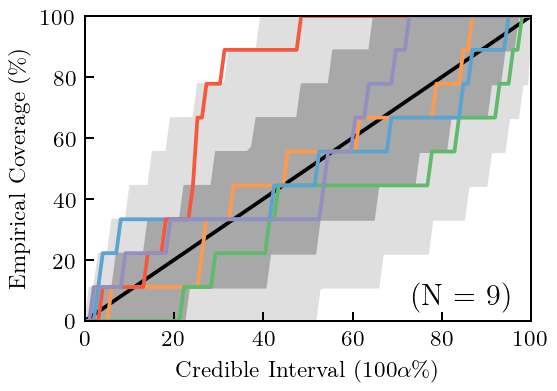

In [24]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AXX"],
    x_quantities_array = [[], [90]],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["prel"]],
    train_test_split_array=[Nolowenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 19

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(1, 1)
(1,)


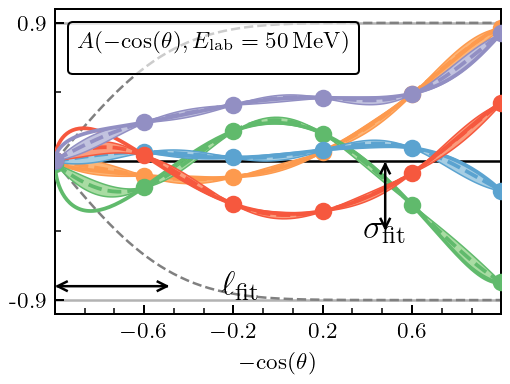

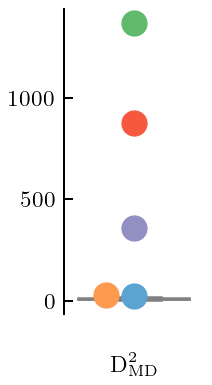

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


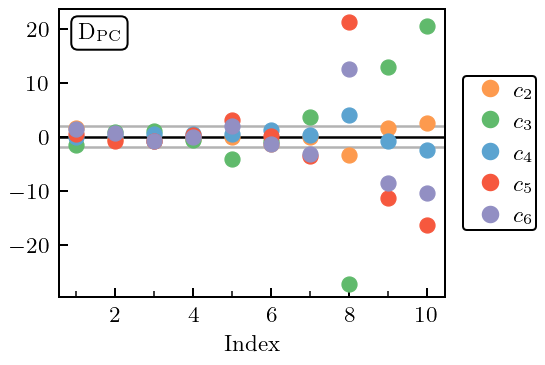

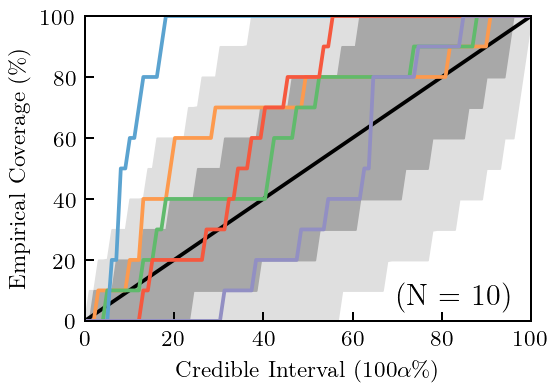

In [25]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 20

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(1, 1)
(1,)


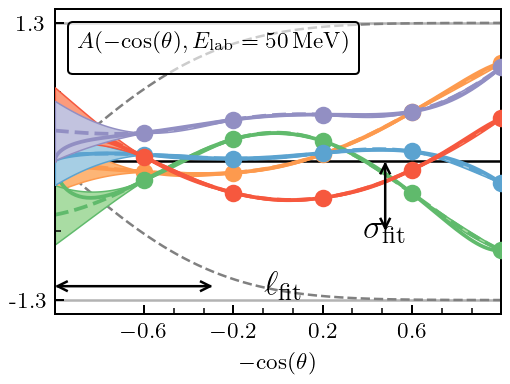

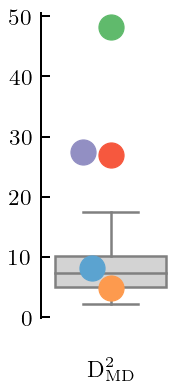

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


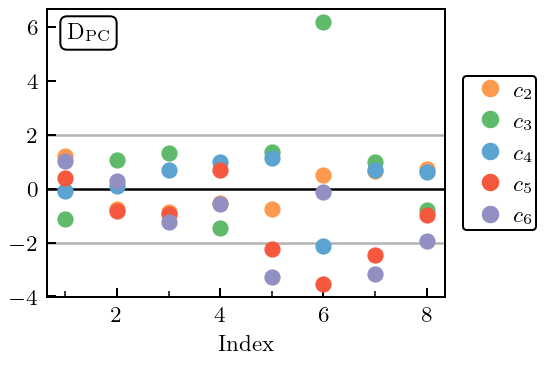

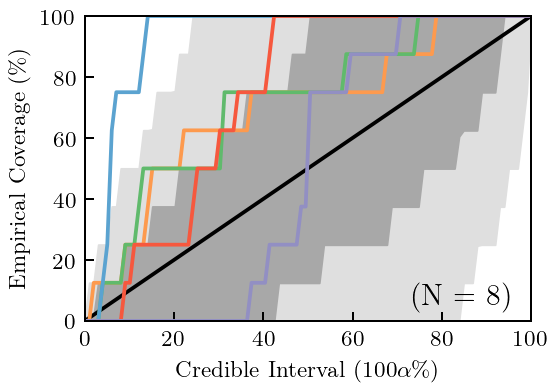

In [26]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Backwardanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 21

(179,)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
44.5


C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(1, 1)
(1,)


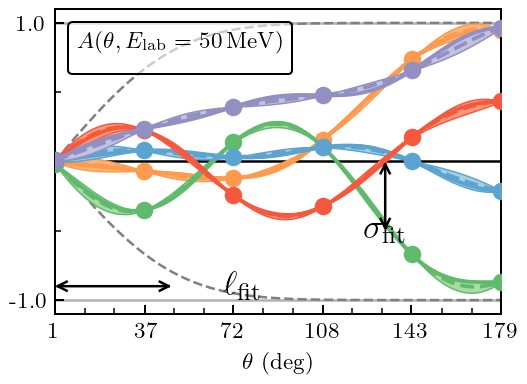

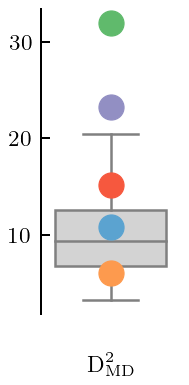

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


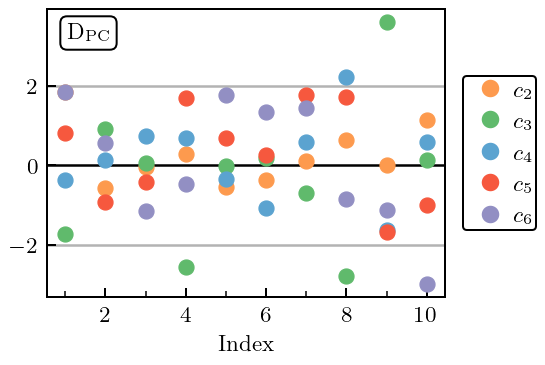

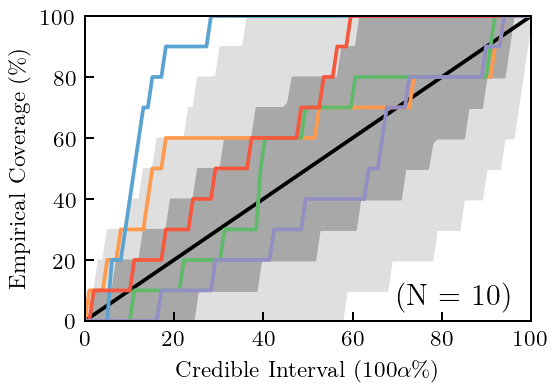

In [27]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["deg"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=144,
    Lambdab=590,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 29

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(2, 1)
(2,)


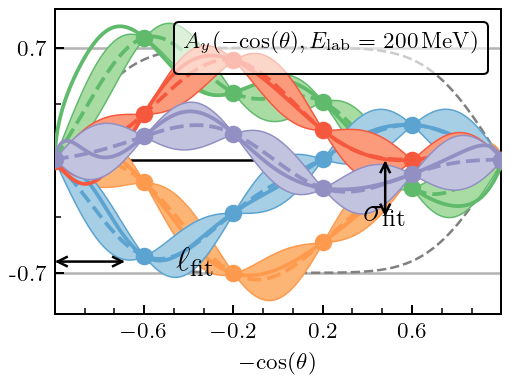

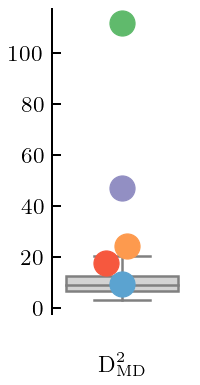

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


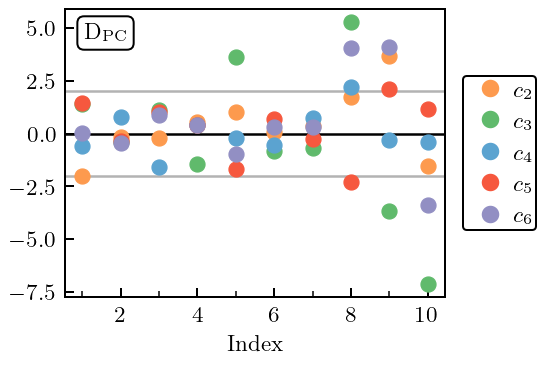

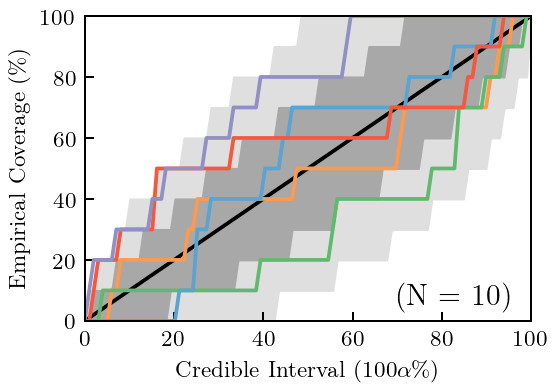

In [28]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    x_quantities_array = [[200], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 30

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(2, 1)
(2,)


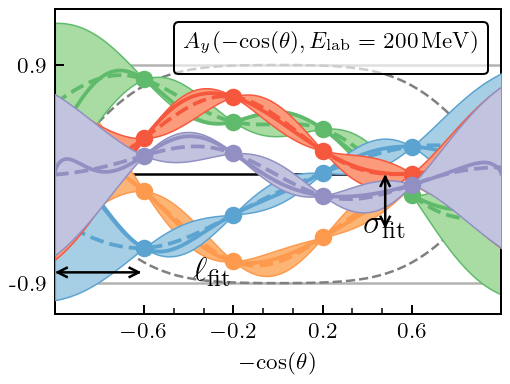

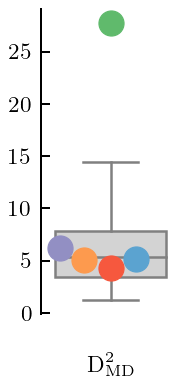

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


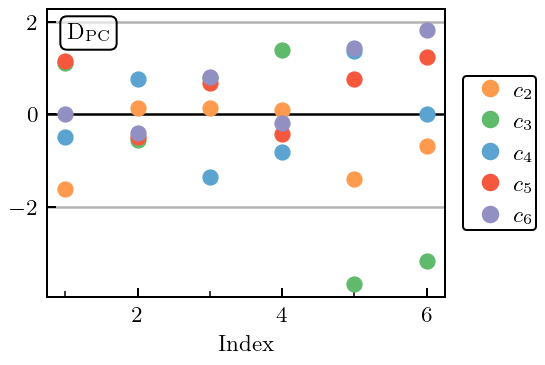

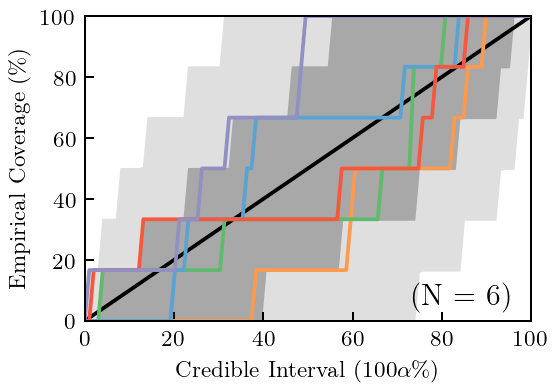

In [29]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    x_quantities_array = [[200], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Middleanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 31

(179,)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
44.5


C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:823: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:9

(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179, 1)
(2, 1)
(2,)


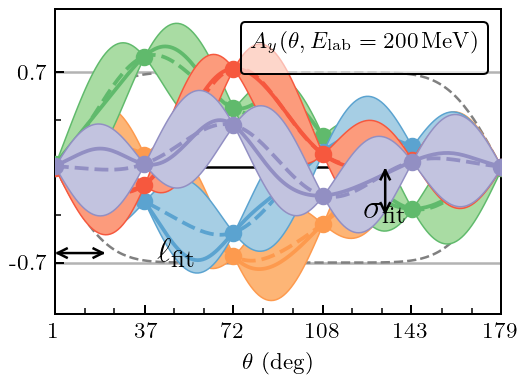

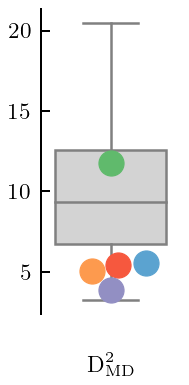

c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:1020: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(self.x_quantity_array)[


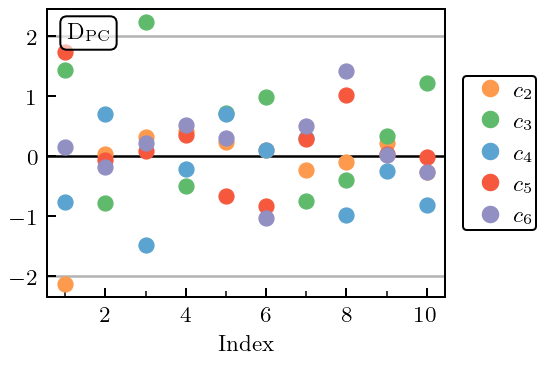

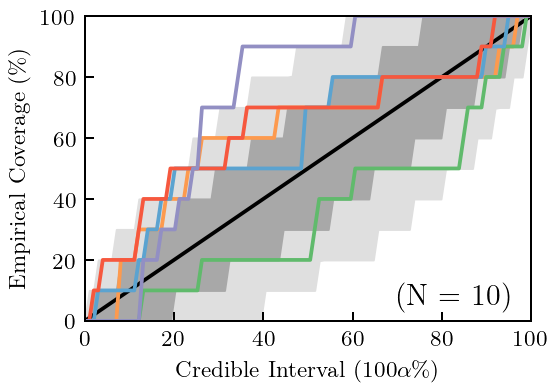

In [30]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    x_quantities_array = [[200], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["deg"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=144,
    Lambdab=590,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 22

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


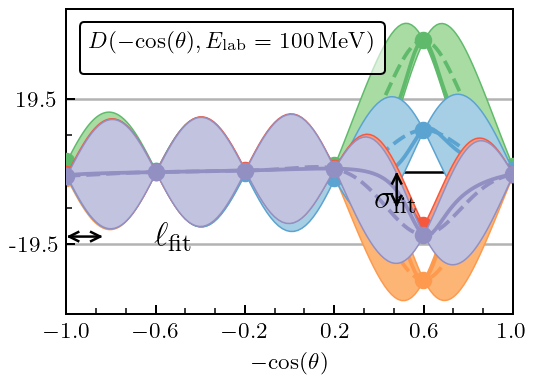

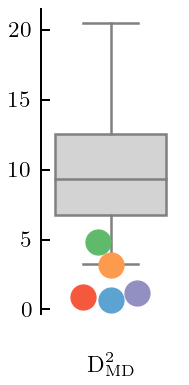

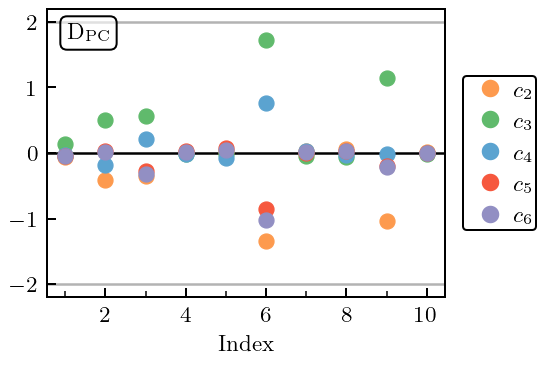

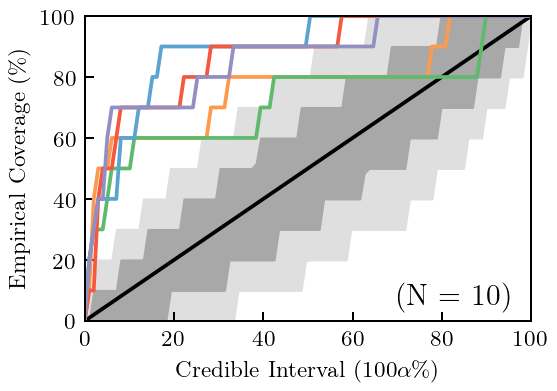

In [31]:
generate_diagnostics(
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D_dimensionful"],
    x_quantities_array = [[100], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_badref",
)

#### Fig. 23

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


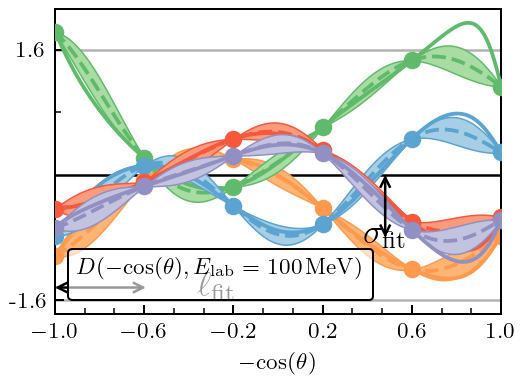

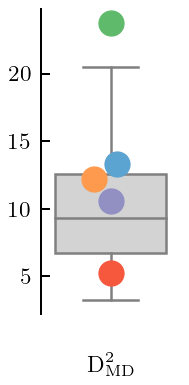

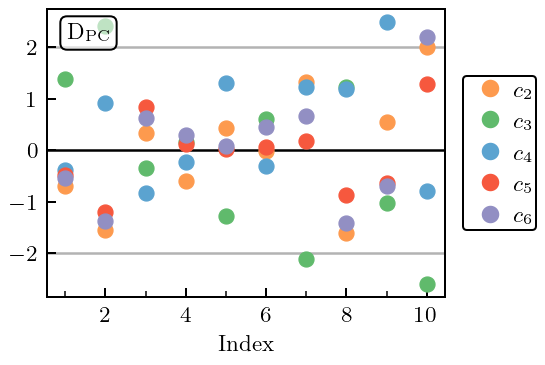

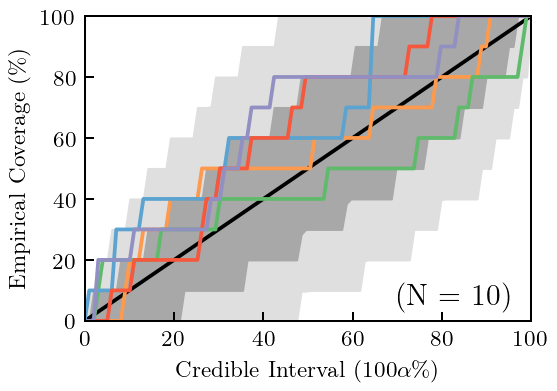

In [32]:
generate_diagnostics(
#     nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
#     E_input_array=[100],
#     deg_input_array=[],
    x_quantities_array = [[100], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
#     LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
#     LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 32

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


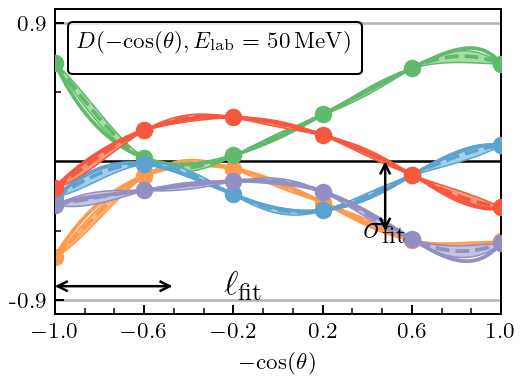

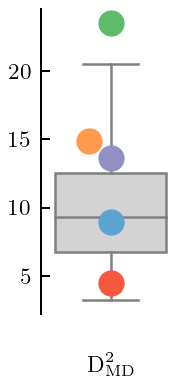

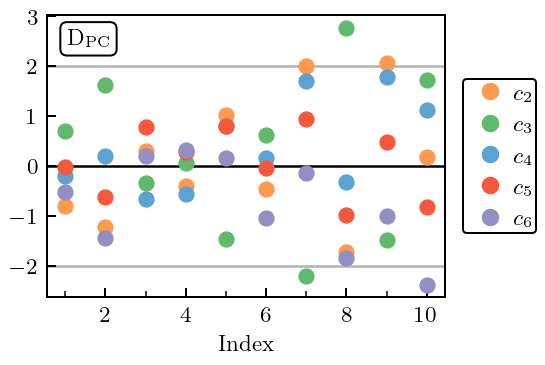

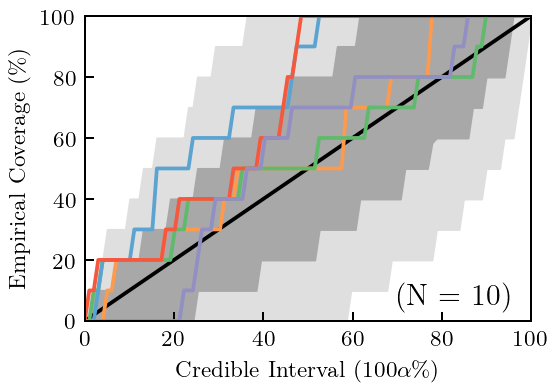

In [33]:
generate_diagnostics(
#     nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
#     E_input_array=[50],
#     deg_input_array=[],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
#     LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
#     LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 33

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


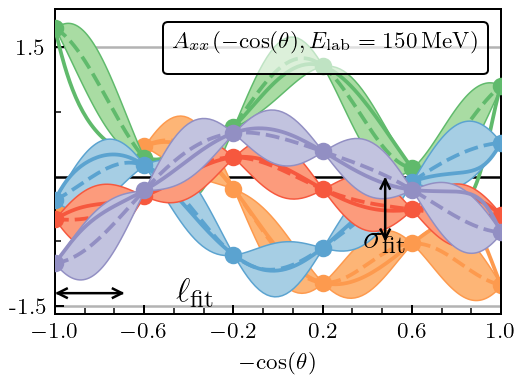

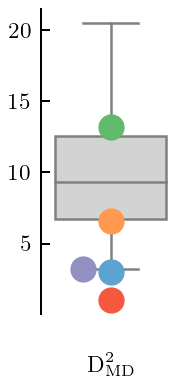

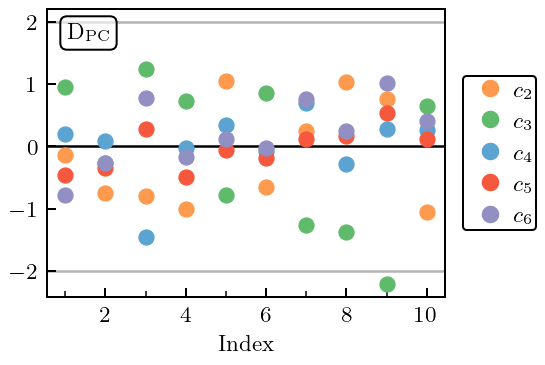

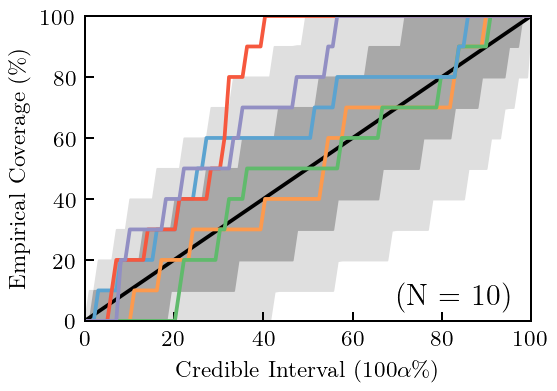

In [34]:
generate_diagnostics(
#     nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AXX"],
#     E_input_array=[150],
#     deg_input_array=[],
    x_quantities_array = [[150], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
#     LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
#     LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 24

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


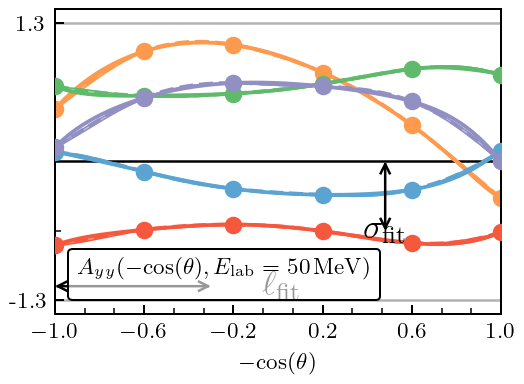

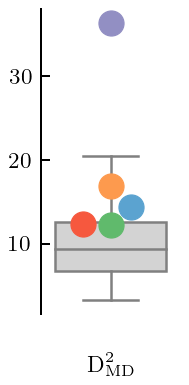

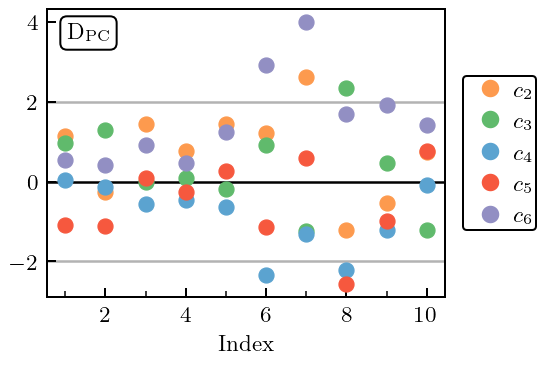

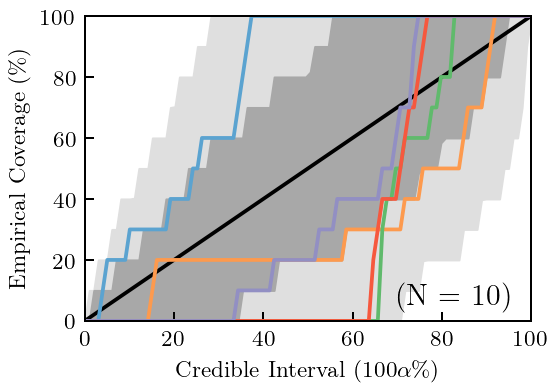

In [35]:
generate_diagnostics(
#     nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
#     E_input_array=[50],
#     deg_input_array=[],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
#     LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
#     LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=138,
    Lambdab=570,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

#### Fig. 25

(179,)
[-9.99847695e-01 -9.99390827e-01 -9.98629535e-01 -9.97564050e-01
 -9.96194698e-01 -9.94521895e-01 -9.92546152e-01 -9.90268069e-01
 -9.87688341e-01 -9.84807753e-01 -9.81627183e-01 -9.78147601e-01
 -9.74370065e-01 -9.70295726e-01 -9.65925826e-01 -9.61261696e-01
 -9.56304756e-01 -9.51056516e-01 -9.45518576e-01 -9.39692621e-01
 -9.33580426e-01 -9.27183855e-01 -9.20504853e-01 -9.13545458e-01
 -9.06307787e-01 -8.98794046e-01 -8.91006524e-01 -8.82947593e-01
 -8.74619707e-01 -8.66025404e-01 -8.57167301e-01 -8.48048096e-01
 -8.38670568e-01 -8.29037573e-01 -8.19152044e-01 -8.09016994e-01
 -7.98635510e-01 -7.88010754e-01 -7.77145961e-01 -7.66044443e-01
 -7.54709580e-01 -7.43144825e-01 -7.31353702e-01 -7.19339800e-01
 -7.07106781e-01 -6.94658370e-01 -6.81998360e-01 -6.69130606e-01
 -6.56059029e-01 -6.42787610e-01 -6.29320391e-01 -6.15661475e-01
 -6.01815023e-01 -5.87785252e-01 -5.73576436e-01 -5.59192903e-01
 -5.44639035e-01 -5.29919264e-01 -5.15038075e-01 -5.00000000e-01
 -4.84809620e-01 -

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)
(179,)


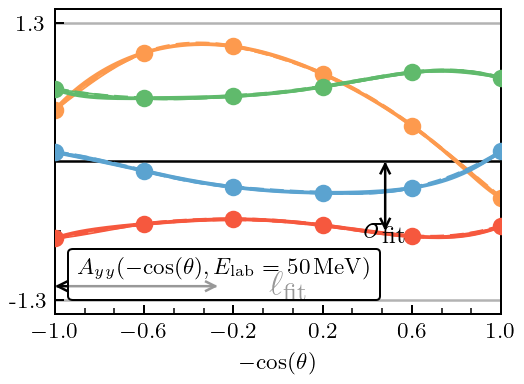

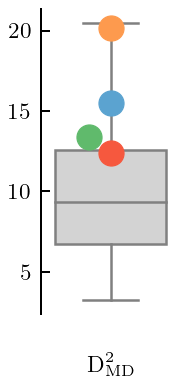

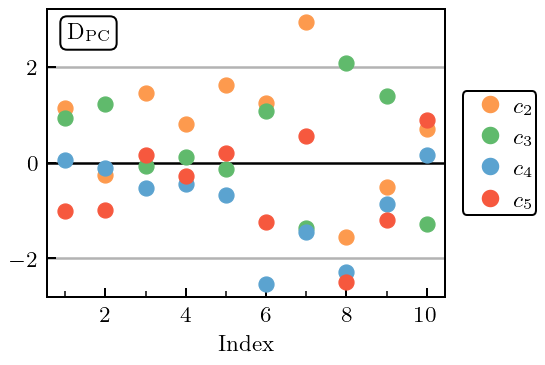

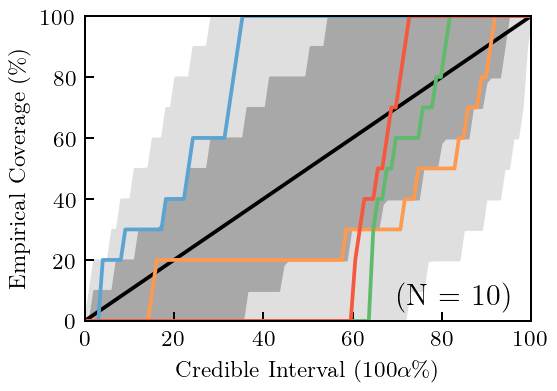

In [36]:
generate_diagnostics(
#     nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
#     E_input_array=[50],
#     deg_input_array=[],
    x_quantities_array = [[50], []],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=[["cos"]],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[6],
    orders_names_dict=None,
    orders_labels_dict=None,
    LengthScale_list=[LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)],
#     LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
#     LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=120,
    Lambdab=528,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=False,
    save_md_bool=False,
    save_pc_bool=False,
    save_ci_bool=False,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_noc6",
)

#### Fig. 9

[]

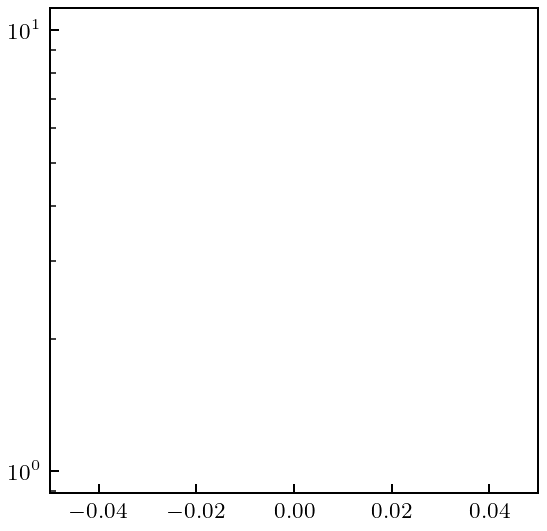

In [37]:
# create figure with n_orders subplots
fig_tlab_var_all_ratio, axs_tlab_var_all_ratio = plt.subplots(1, 1, 
                                                              figsize=(3.5,3.5))
axs_tlab_var_all_ratio.semilogy()

In [38]:
# sets the potential of interest
ScaleScheme = RKE500MeV

# choose energy and angle meshes
t_lab = ScaleScheme.get_data("t_lab")

t_lab_input = E_to_p(E_lab = t_lab, interaction = "np")
# X_train_tlab = E_to_p(E_lab = np.array([5, 21, 48, 85, 133, 192, 261]), 
#                      interaction = "np")[:, None]
# X_train_tlab = E_to_p(E_lab = np.array([1, 12, 33, 65, 108, 161, 225, 300]), 
#                      interaction = "np")[:, None]
X_train_tlab = E_to_p(E_lab = np.array([1, 5, 12, 21, 33, 48, 65, 85, 108, 133, 161, 192, 225, 261, 300, 341]), 
                     interaction = "np")[:, None]
t_lab_label = "Relative momentum (MeV)"
# t_lab_input = t_lab
# X_train_tlab = np.array([5, 21, 48, 85, 133, 192, 261])[:, None]
# t_lab_label = "Lab energy (MeV)"

X_tlab = t_lab_input[:, None]
# t_lab_subset = t_lab_input[0::10]
t_lab_subset = X_train_tlab[:, 0]

degrees = ScaleScheme.get_data("degrees")

# degrees_input = degrees
# X_train_deg = np.array([1, 30, 60, 90, 120, 150, 179])[:, None]
# degrees_label = "Scattering angle (degrees)"
degrees_input = -np.cos(np.radians(degrees))
# X_train_deg = -np.cos(np.radians(np.array([1, 30, 60, 90, 120, 150, 179])))[:, None]
X_train_deg = -np.cos(np.radians(np.array([41, 60, 76, 90, 104, 120, 139])))[:, None]
degrees_label = "Negative cosine"

X_deg = degrees_input[:, None]
# degrees_subset = degrees_input[0::10]
degrees_subset = X_train_deg[:, 0]

Lambda_b_coeffs = 780
mpi_eff_coeffs = 240
# Lambda_b_coeffs = 570
# mpi_eff_coeffs = 138

# calculates ratio
p_type = "pprel"
p_grid = p_approx(p_name = p_type, 
                 prel = E_to_p(E_lab = t_lab, interaction = "np"), 
                 degrees = degrees).T
Q_type = "sum"
ratio = Q_approx(p = p_grid, 
                 Q_parametrization = Q_type, 
                 Lambda_b = Lambda_b_coeffs, 
                 m_pi = mpi_eff_coeffs,
                 single_expansion=False)

In [39]:
axs_tlab_var_all_array = np.array([])

# extracts data
obs_data_name_list = ["DSG", "D", "AXX", "AYY", "A", "PB"]
obs_data_label_list = [r"$\frac{d \sigma}{d \Omega}$", 
                       r"$D$", r"$A_{xx}$", r"$A_{yy}$", r"$A$", r"$A_{y}$"]

for idx, obs_data_name in enumerate(obs_data_name_list):
    obs_data = ScaleScheme.get_data(obs_data_name)
    
    # sets reference scale
    if obs_data_name == "DSG":
        yref = obs_data[-1, :, :]
    else:
        yref = np.ones(np.shape(obs_data)[1:])

    # extracts coefficients
    coeffs_flattened = gm.coefficients(
                np.reshape(obs_data, (np.shape(obs_data)[0], np.shape(obs_data)[1] * np.shape(obs_data)[2])).T, 
                ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
                ref=np.reshape(yref, np.shape(yref)[0] * np.shape(yref)[1]), 
                orders=ScaleScheme.orders_full)
    coeffs_surfaces = np.reshape(coeffs_flattened.T, np.shape(obs_data))

#     axs_tlab_var_all_array = np.array([])

    # plots at each energy in mesh
    for t in t_lab_subset:
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=0.25 * (np.max(degrees_input) - np.min(degrees_input)),
                          length_scale_bounds=(0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                               2 * (np.max(degrees_input) - np.min(degrees_input)))
                   ) + WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        gp.fit(X_train_deg, 
               np.reshape(coeffs_surfaces[:, np.isin(t_lab_input, t), :].T, 
                          (len(degrees), 
                           np.shape(coeffs_surfaces)[0]))[np.isin(degrees_input, X_train_deg), :])
        pred, std = gp.predict(X_deg, return_std=True)
        underlying_std = gp.cov_factor_
#         axs_tlab_var_all.scatter(t, 
#                     underlying_std, 
#     #                 c = 'green')
#                     c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        axs_tlab_var_all_array = np.append(axs_tlab_var_all_array, underlying_std)
        
axs_tlab_var_all_array = np.reshape(axs_tlab_var_all_array, 
                                    (len(obs_data_name_list), len(t_lab_subset)))

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.76521605e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.92459265e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 5, 'warnfla

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([3.87693144e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.97003382e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.15081309e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.683351e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.20139617e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.46039339e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b ter

In [40]:
axs_tlab_var_all_ratio.scatter(list(range(len(obs_data_name_list))), 
    [np.max(axs_tlab_var_all_array[l, :]) / np.min(axs_tlab_var_all_array[l, :]) for l in range(len(axs_tlab_var_all_array))], 
    marker = 'o', 
    edgecolors = 'red',
    label = r'$Q_{\mathrm{sum}}(p_{\mathrm{rel}} \geq 25\,\mathrm{MeV}, m_{\pi}^{\star}, \Lambda_{b}^{\star})$',
#     edgecolors = 'green', 
#     label = r'2D ALLOBS, all $p_{\mathrm{rel}} > 25\,\mathrm{MeV}$',
    linewidths = 2,
    s = 90, 
    facecolors = 'none')
# axs_tlab_var_all_ratio.scatter(list(range(len(obs_data_name_list))), 
#     [np.max(axs_tlab_var_all_array[l, 4:]) / np.min(axs_tlab_var_all_array[l, 4:]) for l in range(len(axs_tlab_var_all_array))], 
#     marker = 's', 
# #     c = 'red', 
# #     label = r'OPAAT, $p_{\mathrm{rel}} > 125\,\mathrm{MeV}$', 
#     c = 'green', 
#     label = r'$Q_{\mathrm{sum}}(p_{\mathrm{rel}} \geq 125\,\mathrm{MeV}, m_{\pi}^{\prime}, \Lambda_{b}^{\prime})$',
#     s = 90)
# axs_tlab_var_all_ratio.legend(loc = 'upper right', 
#                               fontsize = 10,
#                               handletextpad=0.02,
#                               borderpad=0.2)

# axs_tlab_var_all_ratio.set_xticklabels([""] + obs_data_label_list + [""], fontsize = 10)
# axs_tlab_var_all_ratio.tick_params(axis = 'y', labelsize = 10)
# axs_tlab_var_all_ratio.set_xlim(-1, len(obs_data_name_list))
# axs_tlab_var_all_ratio.set_ylim(0.9, 160)

# axs_tlab_var_all.axhspan(0, np.min(axs_tlab_var_all_array[4:-2]), alpha=0.2, color='green')
# axs_tlab_var_all.axhspan(np.max(axs_tlab_var_all_array[4:-2]), 4, alpha=0.2, color='green')

# saves figures
# fig_tlab_var_all_ratio.savefig('figures/' + "var_ratios")

In [41]:
Lambda_b_coeffs = 570
mpi_eff_coeffs = 138

# calculates ratio
p_type = "pprel"
p_grid = p_approx(p_name = p_type, 
                 prel = E_to_p(E_lab = t_lab, interaction = "np"), 
                 degrees = degrees).T
Q_type = "sum"
ratio = Q_approx(p = p_grid, 
                 Q_parametrization = Q_type, 
                 Lambda_b = Lambda_b_coeffs, 
                 m_pi = mpi_eff_coeffs,
                 single_expansion=False)

In [42]:
axs_tlab_var_all_array = np.array([])

# extracts data
obs_data_name_list = ["DSG", "D", "AXX", "AYY", "A", "PB"]
obs_data_label_list = [r"$\frac{d \sigma}{d \Omega}$", 
                       r"$D$", r"$A_{xx}$", r"$A_{yy}$", r"$A$", r"$A_{y}$"]

for idx, obs_data_name in enumerate(obs_data_name_list):
    obs_data = ScaleScheme.get_data(obs_data_name)
    
    # sets reference scale
    if obs_data_name == "DSG":
        yref = obs_data[-1, :, :]
    else:
        yref = np.ones(np.shape(obs_data)[1:])

    # extracts coefficients
    coeffs_flattened = gm.coefficients(
                np.reshape(obs_data, (np.shape(obs_data)[0], np.shape(obs_data)[1] * np.shape(obs_data)[2])).T, 
                ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
                ref=np.reshape(yref, np.shape(yref)[0] * np.shape(yref)[1]), 
                orders=ScaleScheme.orders_full)
    coeffs_surfaces = np.reshape(coeffs_flattened.T, np.shape(obs_data))

#     axs_tlab_var_all_array = np.array([])

    # plots at each energy in mesh
    for t in t_lab_subset:
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=0.25 * (np.max(degrees_input) - np.min(degrees_input)),
                          length_scale_bounds=(0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                               2 * (np.max(degrees_input) - np.min(degrees_input)))
                   ) + WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        gp.fit(X_train_deg, 
               np.reshape(coeffs_surfaces[:, np.isin(t_lab_input, t), :].T, 
                          (len(degrees), 
                           np.shape(coeffs_surfaces)[0]))[np.isin(degrees_input, X_train_deg), :])
        pred, std = gp.predict(X_deg, return_std=True)
        underlying_std = gp.cov_factor_
#         axs_tlab_var_all.scatter(t, 
#                     underlying_std, 
#     #                 c = 'green')
#                     c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        axs_tlab_var_all_array = np.append(axs_tlab_var_all_array, underlying_std)
        
axs_tlab_var_all_array = np.reshape(axs_tlab_var_all_array, 
                                    (len(obs_data_name_list), len(t_lab_subset)))

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.92352075e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 6, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.64416158e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.69023721e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.60038607e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 42, 'nit': 7, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010517]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.44858495e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 6, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b termin

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.38335051e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.61009229e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 33, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.81657524e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 39, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b t

In [43]:
axs_tlab_var_all_ratio.scatter(list(range(len(obs_data_name_list))), 
    [np.max(axs_tlab_var_all_array[l, 4:]) / np.min(axs_tlab_var_all_array[l, 4:]) for l in range(len(axs_tlab_var_all_array))], 
    marker = 's', 
#     c = 'red', 
#     label = r'OPAAT, $p_{\mathrm{rel}} > 125\,\mathrm{MeV}$', 
    c = 'green', 
    label = r'$Q_{\mathrm{sum}}(p_{\mathrm{rel}} \geq 125\,\mathrm{MeV}, m_{\pi}^{\prime}, \Lambda_{b}^{\prime})$',
    s = 90)

axs_tlab_var_all_ratio.legend(loc = 'upper right', 
                              fontsize = 10,
                              handletextpad=0.02,
                              borderpad=0.2)

axs_tlab_var_all_ratio.set_xticklabels([""] + obs_data_label_list + [""], fontsize = 10)
axs_tlab_var_all_ratio.tick_params(axis = 'y', labelsize = 10)
axs_tlab_var_all_ratio.set_xlim(-1, len(obs_data_name_list))
axs_tlab_var_all_ratio.set_ylim(0.9, 160)

# axs_tlab_var_all.axhspan(0, np.min(axs_tlab_var_all_array[4:-2]), alpha=0.2, color='green')
# axs_tlab_var_all.axhspan(np.max(axs_tlab_var_all_array[4:-2]), 4, alpha=0.2, color='green')

# saves figures
fig_tlab_var_all_ratio.savefig('figures/' + "var_ratios")

C:\Users\pjmil\AppData\Local\Temp\ipykernel_30916\806974086.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs_tlab_var_all_ratio.set_xticklabels([""] + obs_data_label_list + [""], fontsize = 10)
